# 데이터 불러오기

In [1]:
# 데이터
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 전처리
import re
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MinMaxScaler, MaxAbsScaler, PowerTransformer

import warnings
# 모든 경고를 끄기
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/DATASET/train.csv").drop('Unnamed: 0',axis=1)
test = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/DATASET/test_1.csv").drop('Unnamed: 0',axis=1)

In [3]:
train

,Species,Farm.Name,Lot.Number,Altitude,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Date,Variety,Processing.Method,...,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Country.of.Origin
0,Arabica,conquista / morito,NaN,NaN,250,1 kg,2012,"January 13th, 2012",Bourbon,Washed / Wet,...,10.0,7.00,78.33,0.11,0,0.0,Green,9,"January 12th, 2013",2
1,Arabica,NaN,NaN,de 1.600 a 1.950 msn,275,70 kg,Mayo a Julio,"July 29th, 2011",Caturra,NaN,...,10.0,8.17,83.08,0.01,0,0.0,NaN,0,"July 28th, 2012",1
2,Arabica,la esmeralda,11/23/0634,4000,25,69 kg,2017,"September 8th, 2017",Bourbon,Washed / Wet,...,10.0,7.50,82.58,0.10,0,1.0,Green,2,"September 8th, 2018",2
3,Arabica,fazenda santo antonio,NaN,900-1100,305,2 kg,2014,"February 13th, 2015",Catuai,Natural / Dry,...,10.0,7.58,83.00,0.00,0,0.0,Green,0,"February 13th, 2016",0
4,Arabica,NaN,NaN,NaN,1,5 lbs,2013,"September 12th, 2014",NaN,Washed / Wet,...,10.0,7.25,82.08,0.11,1,0.0,Green,0,"September 12th, 2015",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,Arabica,NaN,NaN,1800,275,2 kg,2015/2016,"June 5th, 2015",Other,Washed / Wet,...,10.0,7.83,84.25,0.12,0,0.0,Green,0,"June 4th, 2016",1
581,Arabica,cafetal,101,1300,200,69 kg,2017,"July 3rd, 2017",Mundo Novo,Washed / Wet,...,10.0,7.83,83.92,0.11,0,0.0,Green,5,"July 3rd, 2018",3
582,Arabica,las lomas,NaN,1200,250,1 kg,2012,"July 11th, 2012",Bourbon,Washed / Wet,...,10.0,7.67,83.00,0.11,5,0.0,Green,8,"July 11th, 2013",3
583,Arabica,NaN,NaN,1800 msnm,250,70 kg,4T/10,"February 9th, 2011",NaN,NaN,...,10.0,7.42,82.17,0.08,0,0.0,NaN,0,"February 9th, 2012",1


In [4]:
test

,Species,Farm.Name,Lot.Number,Altitude,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Date,Variety,Processing.Method,...,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Country.of.Origin
0,Arabica,santa bárbara,2016/0002,1020,305,59 kg,2016 / 2017,"October 26th, 2016",Catuai,Natural / Dry,...,10.0,7.50,81.92,0.11,0,0,Green,4,"October 26th, 2017",NaN
1,Arabica,el encinal,NaN,975,10,1 kg,2012,"September 27th, 2012",Caturra,Washed / Wet,...,10.0,7.33,79.67,0.13,5,0,NaN,6,"September 27th, 2013",NaN
2,Arabica,caltuchoco,NaN,1100,10,1 kg,2012,"July 26th, 2012",Typica,Washed / Wet,...,10.0,7.50,82.50,0.12,0,0,Green,5,"July 26th, 2013",NaN
3,Arabica,la vuelta,NaN,800,10,1 kg,2012,"September 10th, 2012",Mundo Novo,Washed / Wet,...,10.0,6.58,71.08,0.12,4,0,Green,24,"September 10th, 2013",NaN
4,Arabica,productor independiente guadalupe victoria,NaN,1600,250,1 kg,2012,"August 30th, 2012",Typica,Washed / Wet,...,10.0,7.17,81.50,0.12,0,0,Green,5,"August 30th, 2013",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Arabica,el limon,NaN,NaN,275,1 kg,2012,"March 26th, 2012",Catuai,Natural / Dry,...,10.0,7.67,84.17,0.11,0,0,Bluish-Green,2,"March 26th, 2013",NaN
62,Arabica,various,NaN,1200 m,250,6,08/09 crop,"April 9th, 2010",Typica,NaN,...,10.0,6.58,76.75,0.00,0,0,NaN,0,"April 9th, 2011",NaN
63,Arabica,various,NaN,1300,200,1 kg,2013,"March 29th, 2013",Bourbon,Washed / Wet,...,10.0,7.75,83.25,0.12,0,0,Green,6,"March 29th, 2014",NaN
64,Arabica,NaN,NaN,NaN,250,70 kg,NaN,"February 1st, 2011",NaN,NaN,...,10.0,7.58,83.42,0.10,1,0,NaN,3,"February 1st, 2012",NaN


# Preprocessing

## drop

In [5]:
# Species 데이터는 모두 동일하기 때문에 drop

# Farm.Name 과 Lot.Number은 모델링에 사용하지 않고, 후처리에 사용하기 때문에 drop
# Grading.Date 는 모두 Expiration과 1년차이가 나기 때문에 모델의 효율성을 위해 drop

train['Farm.Name.Unit'] = train['Farm.Name'].isna().astype(int)
train['Lot.Number.Unit'] = train['Lot.Number'].isna().astype(int)

test['Farm.Name.Unit'] = test['Farm.Name'].isna().astype(int)
test['Lot.Number.Unit'] = test['Lot.Number'].isna().astype(int)

train.drop(['Species', 'Farm.Name','Lot.Number','Grading.Date'], axis = 1, inplace = True)
test.drop(['Species', 'Farm.Name','Lot.Number', 'Grading.Date'], axis = 1, inplace = True)

In [6]:
train

,Altitude,Number.of.Bags,Bag.Weight,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Country.of.Origin,Farm.Name.Unit,Lot.Number.Unit
0,NaN,250,1 kg,2012,Bourbon,Washed / Wet,7.17,6.08,6.17,7.25,...,78.33,0.11,0,0.0,Green,9,"January 12th, 2013",2,0,1
1,de 1.600 a 1.950 msn,275,70 kg,Mayo a Julio,Caturra,NaN,7.33,7.33,7.33,7.58,...,83.08,0.01,0,0.0,NaN,0,"July 28th, 2012",1,1,1
2,4000,25,69 kg,2017,Bourbon,Washed / Wet,7.50,7.42,7.42,7.75,...,82.58,0.10,0,1.0,Green,2,"September 8th, 2018",2,0,0
3,900-1100,305,2 kg,2014,Catuai,Natural / Dry,7.67,7.67,7.67,7.50,...,83.00,0.00,0,0.0,Green,0,"February 13th, 2016",0,0,1
4,NaN,1,5 lbs,2013,NaN,Washed / Wet,7.50,7.42,7.42,7.42,...,82.08,0.11,1,0.0,Green,0,"September 12th, 2015",1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,1800,275,2 kg,2015/2016,Other,Washed / Wet,7.83,7.75,7.83,7.58,...,84.25,0.12,0,0.0,Green,0,"June 4th, 2016",1,1,1
581,1300,200,69 kg,2017,Mundo Novo,Washed / Wet,7.83,7.83,7.58,7.92,...,83.92,0.11,0,0.0,Green,5,"July 3rd, 2018",3,0,0
582,1200,250,1 kg,2012,Bourbon,Washed / Wet,7.50,7.67,7.50,7.50,...,83.00,0.11,5,0.0,Green,8,"July 11th, 2013",3,0,1
583,1800 msnm,250,70 kg,4T/10,NaN,NaN,7.58,7.67,7.42,7.17,...,82.17,0.08,0,0.0,NaN,0,"February 9th, 2012",1,1,1


## Altitude

In [7]:
## Altitude의 고도를 정확히 넣기 위한 함수 제작

def to_meters(value): 
    if pd.isnull(value): #결측치인 경우 결측치 반환
        return np.nan
    
    if value.isdigit():
        return float(value)  # 이미 숫자인 경우 그대로 반환합니다.
    
    if isinstance(value, str):
        # 정규표현식을 사용하여 숫자를 추출합니다.
        numbers = re.findall(r'\d+\.?\d*', value) # 숫자를 뽑아냄
        value = value.replace('.', '') # 단위에서 .으로 구분된 경우가 있어, 이를 제거
        
        if len(numbers) == 1:
            number = float(numbers[0])
            # 단위에 따라 변환합니다.
            if 'ft' in value.lower() or 'pies' in value.lower() or 'feet' in value.lower() or 'psn' in value.lower() or 'psnm' in value.lower():
                return number * 0.3048  # 피트(ft)를 미터(m)로 변환
            elif 'mts' in value.lower() or 'metros' in value.lower()or 'msnm' in value.lower():
                return number  # 미터(m)는 그대로 반환합니다.
            elif 'km' in value.lower() or 'msn' in value.lower() :
                return number * 1000  # 킬로미터(km)를 미터(m)로 변환
            elif 'miles' in value.lower():
                return number * 1609.34  # 마일(miles)을 미터(m)로 변환
            elif 'psn' in value.lower() or 'psnm' in value.lower():
                return number
            else:
                return number
            
        elif len(numbers) == 2:
            # 숫자가 두 개인 경우에는 평균을 계산하여 반환
            avg_number = (float(numbers[0]) + float(numbers[1])) / 2
            if 'ft' in value.lower() or 'pies' in value.lower() or 'feet' in value.lower() or 'psn' in value.lower() or 'psnm' in value.lower():
                return avg_number * 0.3048  # 피트(ft)를 미터(m)로 변환
            elif 'mts' in value.lower() or 'metros' in value.lower() or 'msnm' in value.lower():
                return avg_number  # 미터(m)는 그대로 반환합니다.
            elif 'km' in value.lower() or 'msn' in value.lower():
                return avg_number * 1000  # 킬로미터(km)를 미터(m)로 변환
            elif 'miles' in value.lower():
                return avg_number * 1609.34  # 마일(miles)을 미터(m)로 변환
            else:
                return avg_number
    return np.nan

train['Converted.Altitude'] = train['Altitude'].apply(to_meters)
test['Converted.Altitude'] = test['Altitude'].apply(to_meters)

# traget 나라의 위치인 북미, 중미, 남미의 최고 해발고도는 6,960. 이에 따라 6000이상은 6000으로 넣음
train.loc[train['Converted.Altitude'] >= 6000, 'Converted.Altitude'] = 6000
test.loc[test['Converted.Altitude'] >= 6000, 'Converted.Altitude'] = 6000

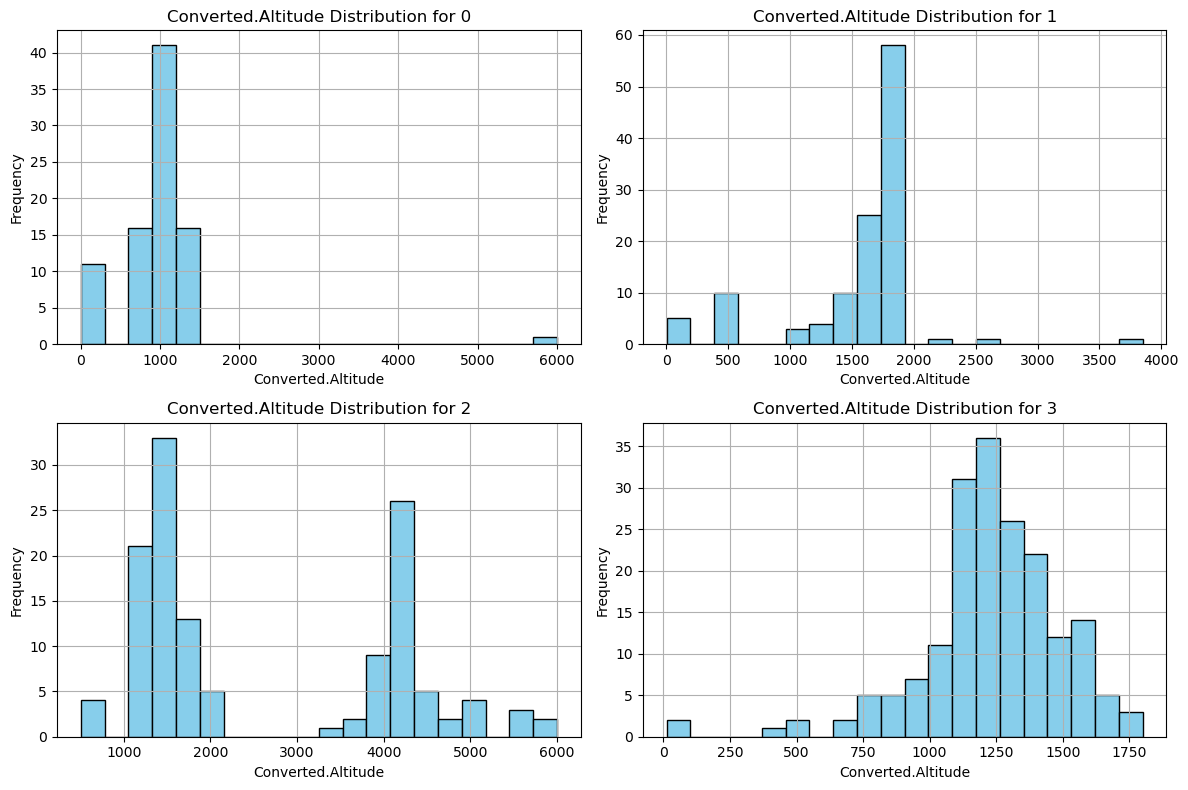

In [8]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Converted.Altitude'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Converted.Altitude Distribution for {country}')
    plt.xlabel('Converted.Altitude')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
train.drop('Altitude', axis = 1, inplace = True)
test.drop('Altitude', axis = 1, inplace = True)

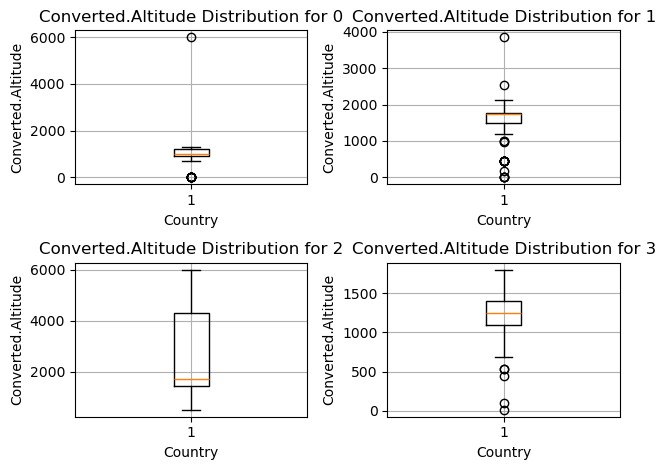

In [10]:
# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.boxplot(country_df['Converted.Altitude'].dropna())
    plt.title(f'Converted.Altitude Distribution for {country}')
    plt.xlabel('Country')
    plt.ylabel('Converted.Altitude')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
mean_altitude = train['Converted.Altitude'].mean()

# 결측치를 평균으로 넣어줌
train['Converted.Altitude'].fillna(mean_altitude, inplace=True)
test['Converted.Altitude'].fillna(mean_altitude, inplace=True)


## Number.of.Bags

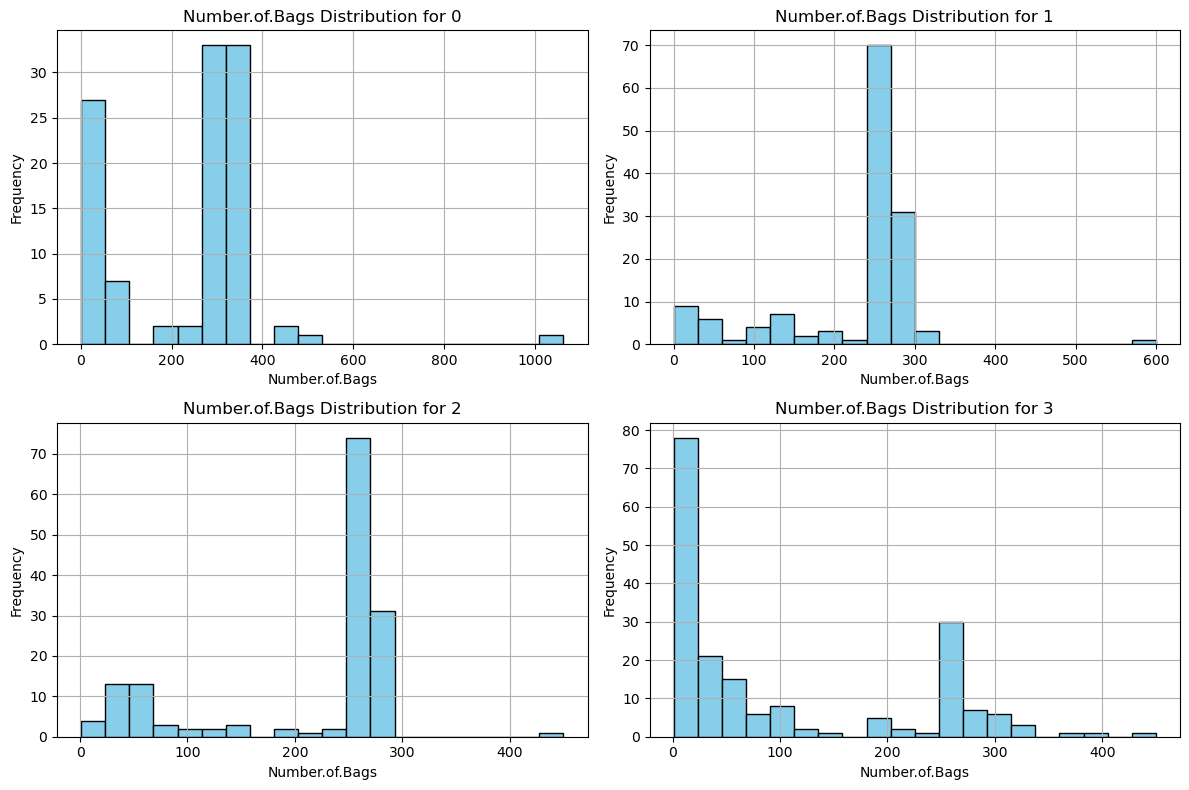

In [12]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Number.of.Bags'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Number.of.Bags Distribution for {country}')
    plt.xlabel('Number.of.Bags')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


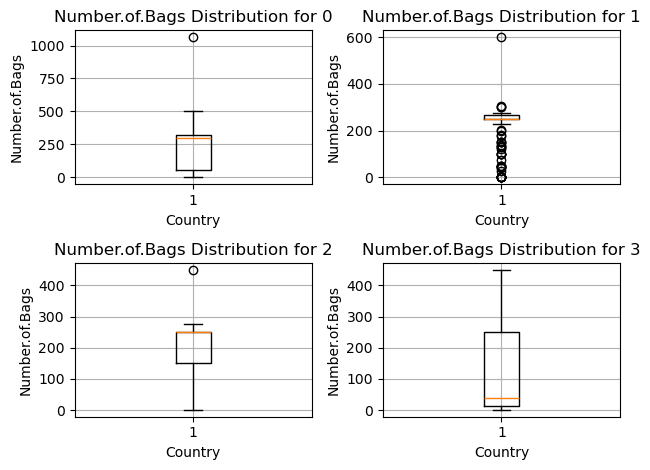

In [13]:
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.boxplot(country_df['Number.of.Bags'].dropna())
    plt.title(f'Number.of.Bags Distribution for {country}')
    plt.xlabel('Country')
    plt.ylabel('Number.of.Bags')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
# train에서 'Number.of.Bags'이 500 이상인 경우는 결측치로 생각하고 이를 드랍
train = train[train['Number.of.Bags'] < 500]

## Bag.Weight

<Figure size 1200x800 with 0 Axes>

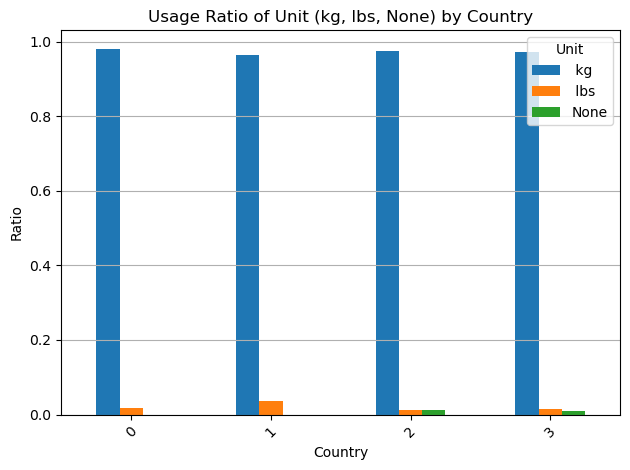

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임으로 복사
train_df = train.copy()

# 'Bag.Weight'에서 단위 추출하여 'Unit' 열 추가
train_df['Unit'] = train_df['Bag.Weight'].str.extract(r'(\D+)$')

# 단위가 없는 경우를 'None'으로 대체
train_df['Unit'].fillna('None', inplace=True)

# 각 나라별로 단위별 사용 횟수 계산
unit_counts = train_df.groupby(['Country.of.Origin', 'Unit']).size().unstack(fill_value=0)

# 각 단위별 사용 횟수를 해당 단위가 사용된 전체 나라의 개수로 나누어 비율 계산
unit_ratios = unit_counts.div(unit_counts.sum(axis=1), axis=0)

# 시각화
plt.figure(figsize=(12, 8))

# 각 나라별로 단위별 사용 비율 그래프 출력
unit_ratios.plot(kind='bar')
plt.title('Usage Ratio of Unit (kg, lbs, None) by Country')
plt.xlabel('Country')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.legend(title='Unit')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [16]:
# 무게의 단위를 킬로그램으로 변화하고, 단위를 return하는 함수

def convert_to_kg(value):
    # 만약 값이 비어있으면 그대로 반환
    if pd.isna(value):
        return float(value), None
    
    # 만약 값에 'kg'가 포함되어 있다면 이를 삭제한 후 반환
    elif 'kg' in str(value):
        return float(value.replace('kg', '').strip()), 0
    
    # 만약 값이 'lbs'로 끝나면 lbs를 kg로 변환하여 반환
    elif str(value).endswith('lbs'):
        weight_in_lbs = float(value.replace('lbs', '').strip())
        weight_in_kg = weight_in_lbs * 0.453592  # 1 lbs = 0.453592 kg
        return weight_in_kg, 1
    # 그 외의 경우는 단위가 없는 값으로 간주하여 kg로 반환
    else:
        return float(value), 2

train['Converted.Bag.Weight'], train['Bag.Unit'] = zip(*train['Bag.Weight'].apply(convert_to_kg))
test['Converted.Bag.Weight'], test['Bag.Unit'] = zip(*test['Bag.Weight'].apply(convert_to_kg))


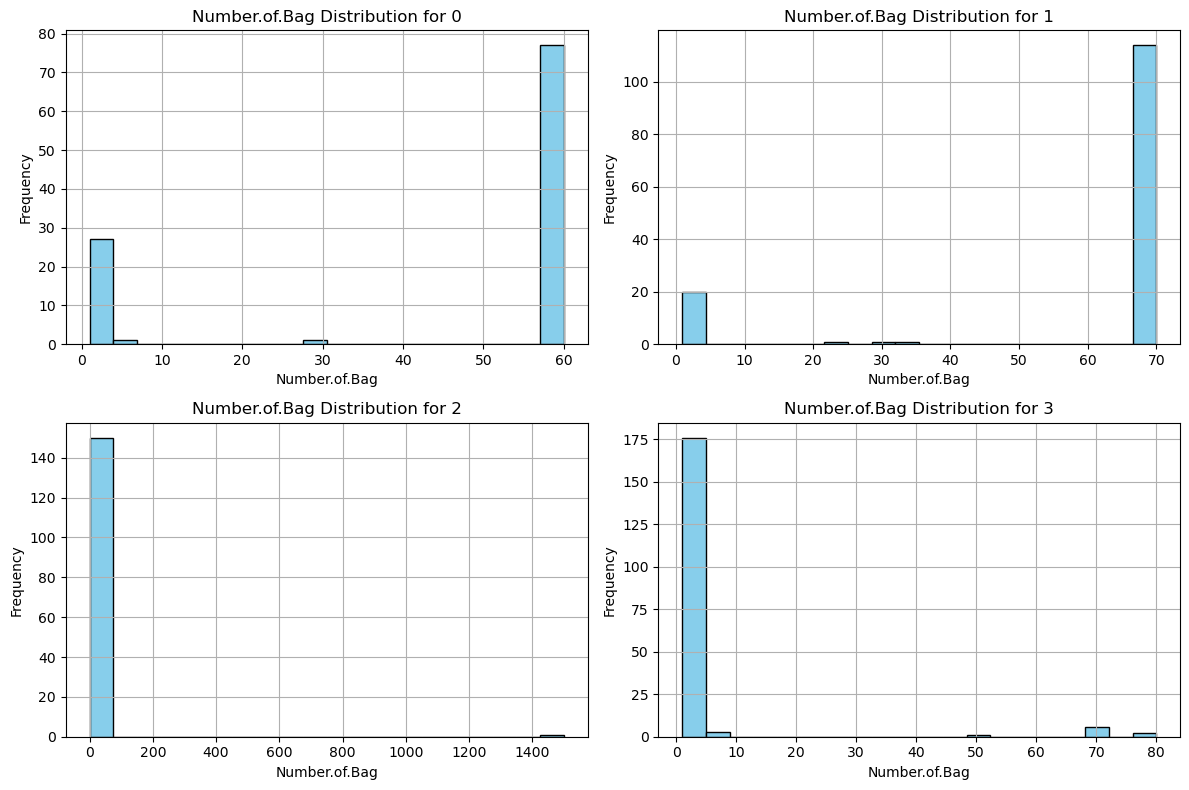

In [17]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Converted.Bag.Weight'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Number.of.Bag Distribution for {country}')
    plt.xlabel('Number.of.Bag')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [18]:
# 무게가 100 이상이면 이는 이상치라 가정후 제거
train = train[train['Converted.Bag.Weight'] < 100] 

In [19]:
train.drop('Bag.Weight', axis = 1, inplace = True)
test.drop('Bag.Weight', axis = 1, inplace = True)

## Harvest.Year

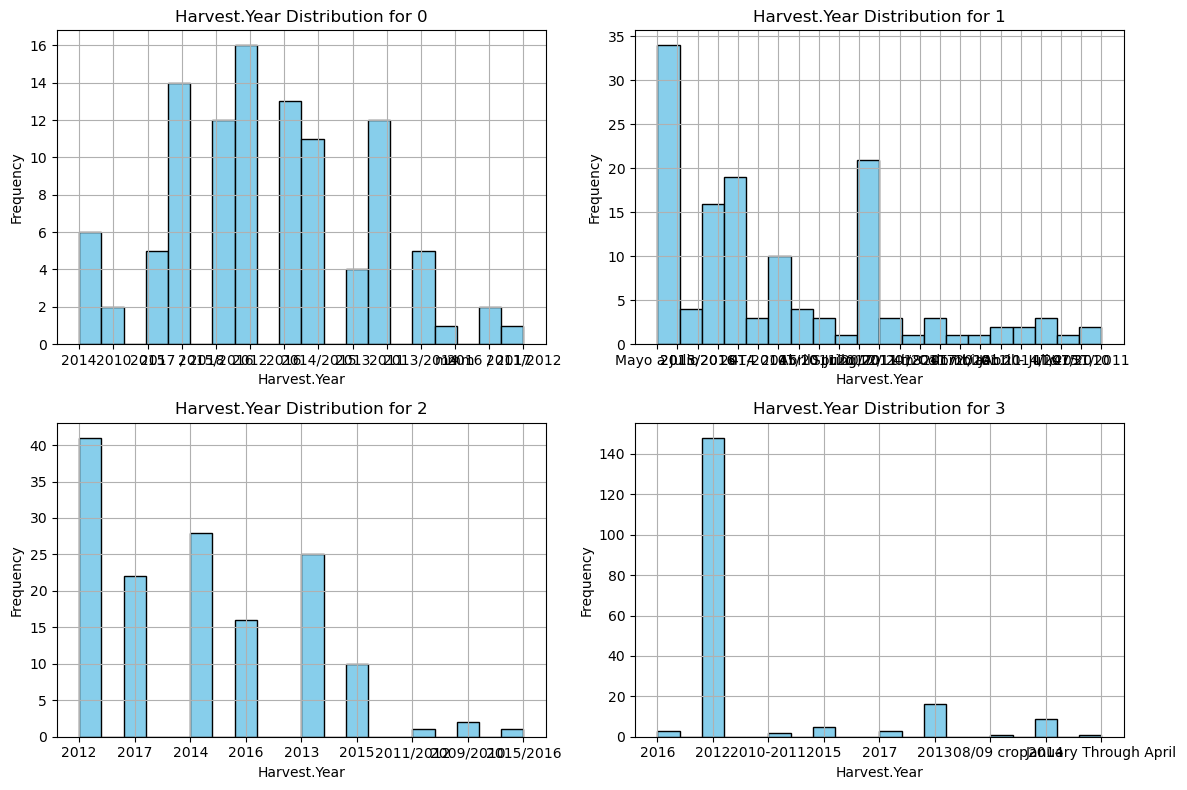

In [20]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Harvest.Year'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Harvest.Year Distribution for {country}')
    plt.xlabel('Harvest.Year')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
missing_year_rows = train[train['Harvest.Year'].apply(lambda x: not str(x).isdigit())]
missing_year_rows[['Harvest.Year', 'Country.of.Origin']]


,Harvest.Year,Country.of.Origin
1,Mayo a Julio,1
14,2015/2016,1
16,2017 / 2018,0
21,2010-2011,3
24,2015/2016,0
...,...,...
559,Abril - Julio,1
570,2013/2014,0
576,2014/2015,0
580,2015/2016,1


In [22]:
missing_year_rows['Country.of.Origin'].value_counts()

Country.of.Origin
0    48
1    34
2     8
3     4
Name: count, dtype: int64

In [23]:
train['Country.of.Origin'].value_counts()

Country.of.Origin
3    188
2    150
1    137
0    106
Name: count, dtype: int64

In [24]:
# 'Harvest.Year' 열에 숫자가 없는 행을 찾아 'Harvest.Year.Unit' 열에 1을 할당
train['Harvest.Year.Unit'] = train['Harvest.Year'].apply(lambda x: 1 if not str(x).isdigit() else 0)
test['Harvest.Year.Unit'] = test['Harvest.Year'].apply(lambda x: 1 if not str(x).isdigit() else 0)

In [25]:
train['Harvest.Year.Unit'].value_counts()

Harvest.Year.Unit
0    487
1     94
Name: count, dtype: int64

In [26]:
def extract_year(date_string):
    if '/' in str(date_string):
        extracted = str(date_string).split('/')[-1]
        if extracted.isdigit():
            return int(extracted)
        else:
            return None
    elif '-' in str(date_string):
        extracted = str(date_string).split('-')[-1]
        if extracted.isdigit():
            return int(extracted)
        else:
            return None
    else:
        return date_string

# 'Harvest.Year' 열에서 년도 추출
train['Extracted.Year'] = train['Harvest.Year'].apply(extract_year)
test['Extracted.Year'] = test['Harvest.Year'].apply(extract_year)


In [27]:
train[train['Extracted.Year'].apply(lambda x: not (str(x).isdigit() and len(str(x)) == 4))]


,Number.of.Bags,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,...,Category.Two.Defects,Expiration,Country.of.Origin,Farm.Name.Unit,Lot.Number.Unit,Converted.Altitude,Converted.Bag.Weight,Bag.Unit,Harvest.Year.Unit,Extracted.Year
1,275,Mayo a Julio,Caturra,NaN,7.33,7.33,7.33,7.58,7.25,8.08,...,0,"July 28th, 2012",1,1,1,1775.000000,70.0,0,1,Mayo a Julio
16,320,2017 / 2018,Bourbon,Natural / Dry,7.50,7.33,7.42,7.58,7.58,6.92,...,3,"October 20th, 2018",0,0,0,890.000000,60.0,0,1,None
26,440,2017 / 2018,Catuai,Natural / Dry,7.17,7.33,7.42,7.08,7.00,7.00,...,1,"November 3rd, 2018",0,0,0,995.000000,59.0,0,1,None
38,250,4T/10,NaN,NaN,7.25,7.17,7.00,6.75,7.17,7.33,...,4,"February 9th, 2012",1,1,1,1800.000000,70.0,0,1,10
56,300,2017 / 2018,Caturra,Washed / Wet,7.50,7.58,7.58,7.50,7.75,7.83,...,1,"November 9th, 2018",1,1,0,439.000000,29.0,0,1,None
57,320,2017 / 2018,Bourbon,Natural / Dry,7.42,7.50,7.25,7.50,7.50,7.25,...,5,"October 20th, 2018",0,0,0,890.000000,60.0,0,1,None
82,250,4T/10,NaN,NaN,8.08,7.67,7.67,7.33,7.33,7.17,...,3,"February 9th, 2012",1,1,1,1800.000000,70.0,0,1,10
88,250,08/09 crop,Typica,NaN,6.75,6.75,6.83,7.25,7.58,7.08,...,8,"April 9th, 2011",3,0,1,1200.000000,6.0,2,1,None
102,250,4T/10,NaN,NaN,7.75,7.67,7.25,7.25,7.58,8.50,...,1,"February 9th, 2012",1,1,1,1600.000000,70.0,0,1,10
122,149,NaN,NaN,NaN,7.17,7.25,7.08,7.42,7.08,7.42,...,2,"March 14th, 2012",1,1,1,1616.486103,70.0,0,1,NaN


데이터를 확인해본결과 대부분 Extracted.Year은 Expiration의 년도와 대부분 1년차이임. 결측치를 채울시 Expiration.Year - 1 로 함.

In [28]:
train.drop('Harvest.Year', axis = 1, inplace = True)
test.drop('Harvest.Year', axis = 1, inplace = True)

## Variety

In [29]:
train['Variety'].isna().sum()

61

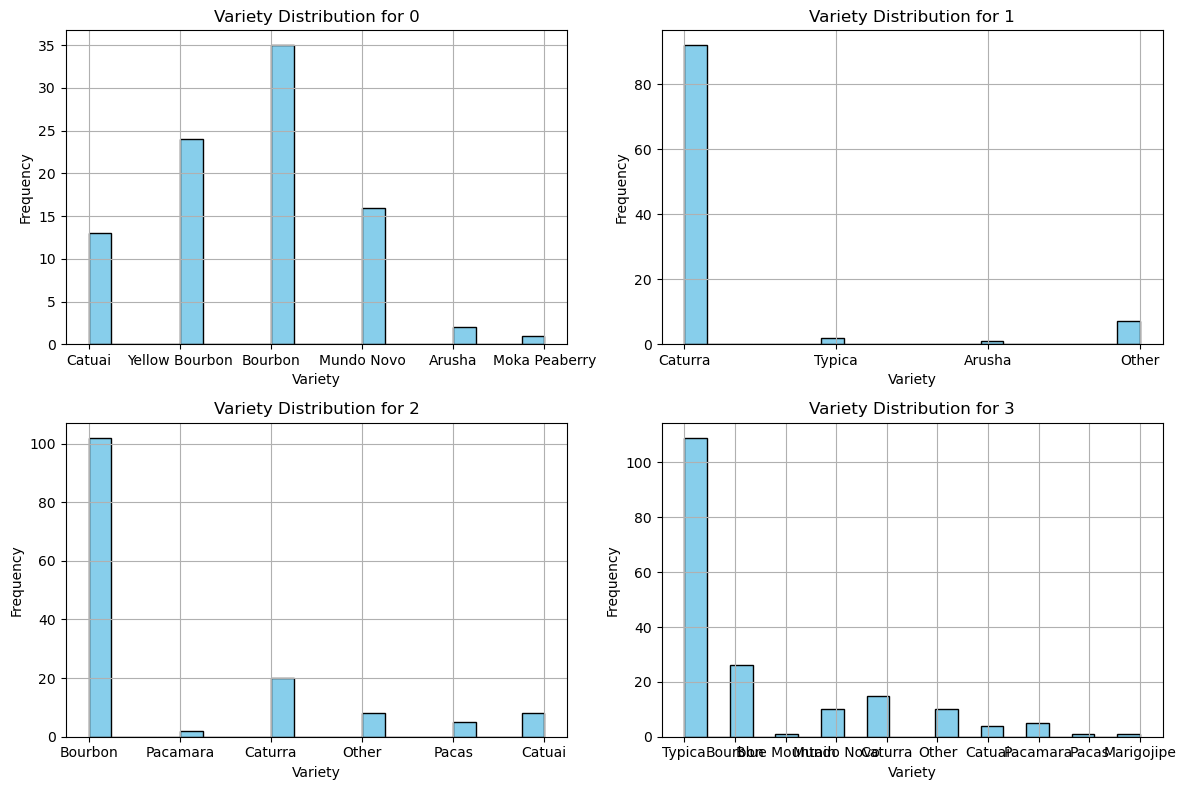

In [30]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Variety'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Variety Distribution for {country}')
    plt.xlabel('Variety')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [31]:
train['Variety'].unique()

array(['Bourbon', 'Caturra', 'Catuai', nan, 'Yellow Bourbon', 'Pacamara',
       'Typica', 'Blue Mountain', 'Mundo Novo', 'Other', 'Pacas',
       'Arusha', 'Moka Peaberry', 'Marigojipe'], dtype=object)

In [32]:
train[train['Variety'].isna()]['Country.of.Origin'].value_counts()

Country.of.Origin
1    35
0    15
3     6
2     5
Name: count, dtype: int64

In [33]:
test[test['Variety'].isna()]

,Number.of.Bags,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,...,Category.Two.Defects,Expiration,Country.of.Origin,Farm.Name.Unit,Lot.Number.Unit,Converted.Altitude,Converted.Bag.Weight,Bag.Unit,Harvest.Year.Unit,Extracted.Year
10,320,NaN,NaN,8.17,7.67,7.75,7.75,7.67,7.75,10.0,...,0,"March 21st, 2012",NaN,1,1,1616.486103,60.00000,0,1,TEST
22,1,NaN,Natural / Dry,7.50,7.58,7.42,7.58,7.42,7.58,10.0,...,4,"December 10th, 2014",NaN,1,1,1616.486103,2.00000,0,0,2012
36,275,NaN,Washed / Wet,7.67,7.75,7.67,7.75,7.75,7.75,10.0,...,0,"July 16th, 2015",NaN,1,1,1616.486103,2.26796,1,0,2013
39,270,NaN,NaN,7.50,7.42,7.33,7.33,7.67,7.83,10.0,...,2,"September 3rd, 2011",NaN,1,1,1616.486103,70.00000,0,1,2010
49,149,NaN,NaN,7.08,7.25,7.00,7.50,7.08,7.33,10.0,...,2,"March 14th, 2012",NaN,1,1,1616.486103,70.00000,0,1,NaN
64,250,NaN,NaN,7.58,7.58,7.58,7.67,7.75,7.67,10.0,...,3,"February 1st, 2012",NaN,1,1,1616.486103,70.00000,0,1,NaN


In [34]:
train['Variety.Unit'] = train['Variety'].fillna(1)
train['Variety.Unit'] = train['Variety.Unit'].apply(lambda x: 1 if x == 1 else 0)

test['Variety.Unit'] = test['Variety'].fillna(1)
test['Variety.Unit'] = test['Variety.Unit'].apply(lambda x: 1 if x == 1 else 0)

In [35]:
train['Variety'] = train['Variety'].fillna('Other')
test['Variety'] = test['Variety'].fillna('Other')

## Processing.Method

In [36]:
train['Processing.Method'].unique()

array(['Washed / Wet', nan, 'Natural / Dry', 'Pulped natural / honey',
       'Semi-washed / Semi-pulped', 'Other'], dtype=object)

In [37]:
train['Processing.Method'].isna().sum()

52

In [38]:
train[train['Processing.Method'].isna()]['Country.of.Origin'].value_counts()

Country.of.Origin
1    28
0    11
2     7
3     6
Name: count, dtype: int64

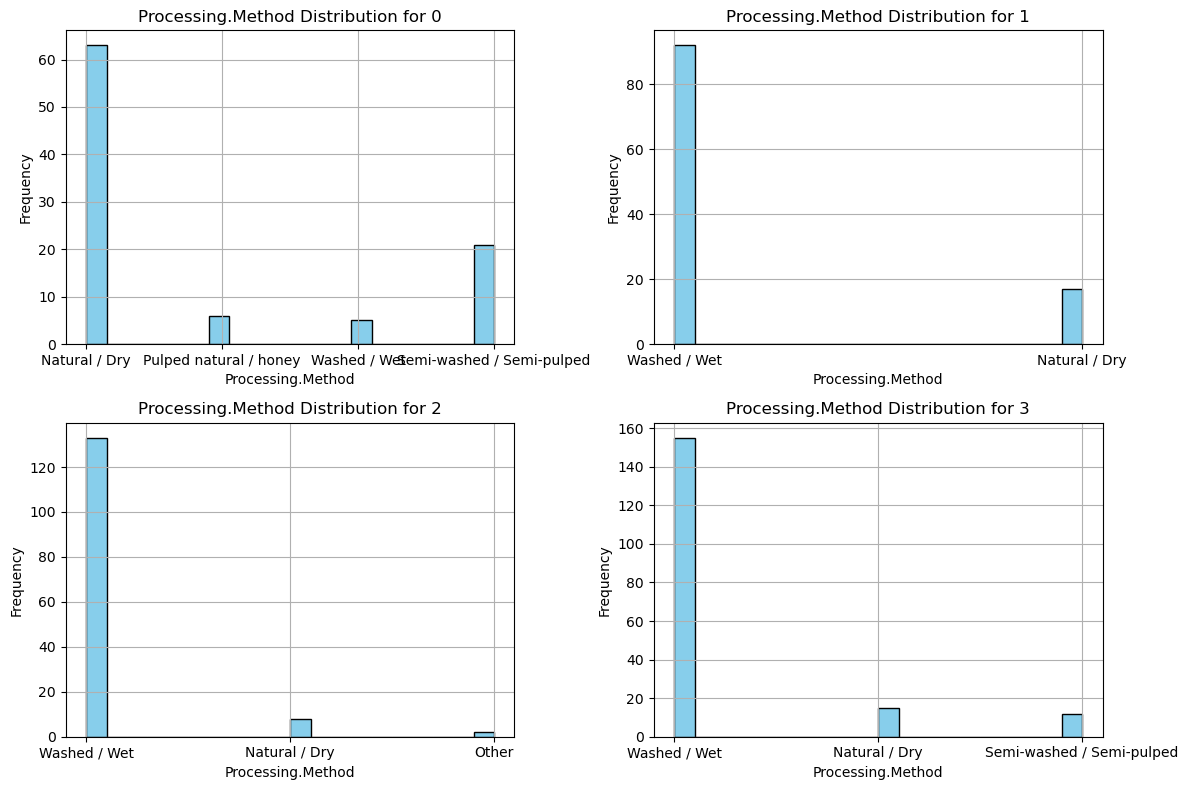

In [39]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Processing.Method'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Processing.Method Distribution for {country}')
    plt.xlabel('Processing.Method')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [40]:
train['Processing.Method.Unit'] = train['Processing.Method'].fillna(1)
train['Processing.Method.Unit'] = train['Processing.Method.Unit'].apply(lambda x: 1 if x == 1 else 0)

test['Processing.Method.Unit'] = test['Processing.Method'].fillna(1)
test['Processing.Method.Unit'] = test['Processing.Method.Unit'].apply(lambda x: 1 if x == 1 else 0)

In [41]:
train['Processing.Method'] = train['Processing.Method'].fillna('Other')
test['Processing.Method'] = test['Processing.Method'].fillna('Other')

## Aroma

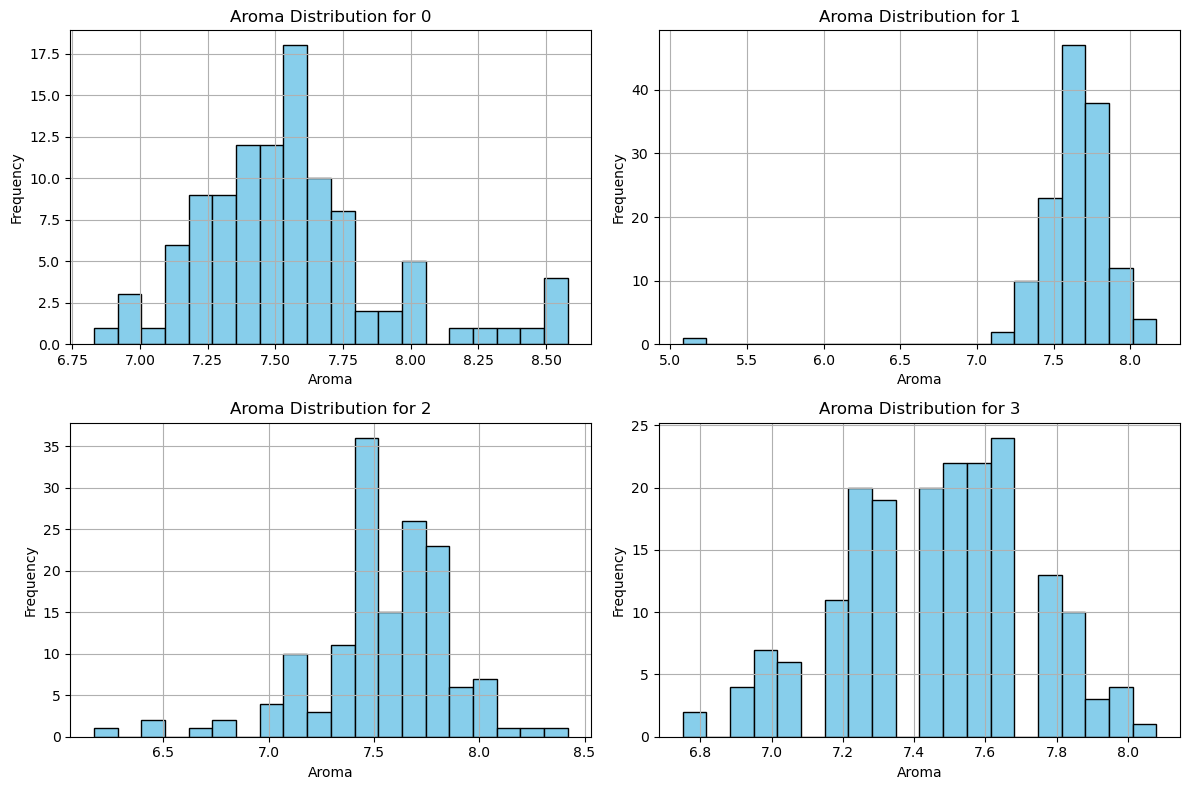

In [42]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Aroma'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Aroma Distribution for {country}')
    plt.xlabel('Aroma')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Flavor


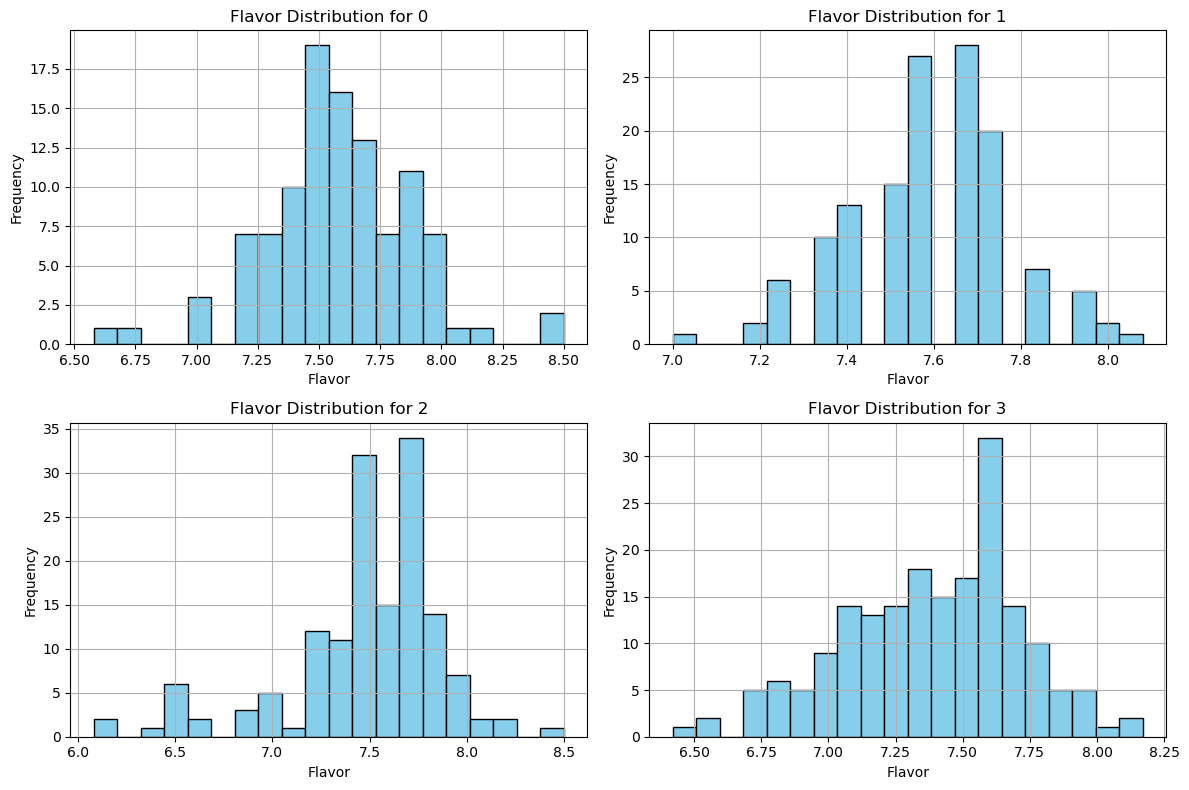

In [43]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Flavor'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Flavor Distribution for {country}')
    plt.xlabel('Flavor')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Aftertaste

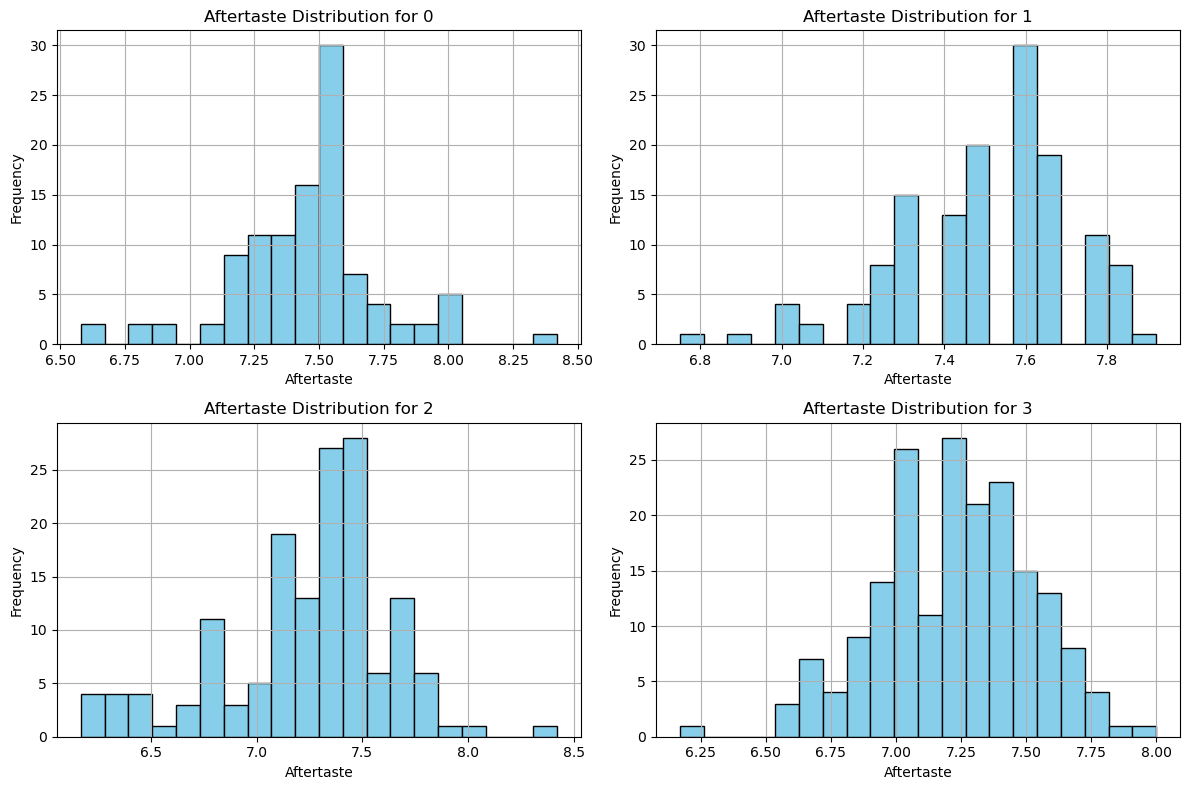

In [44]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Aftertaste'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Aftertaste Distribution for {country}')
    plt.xlabel('Aftertaste')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Body

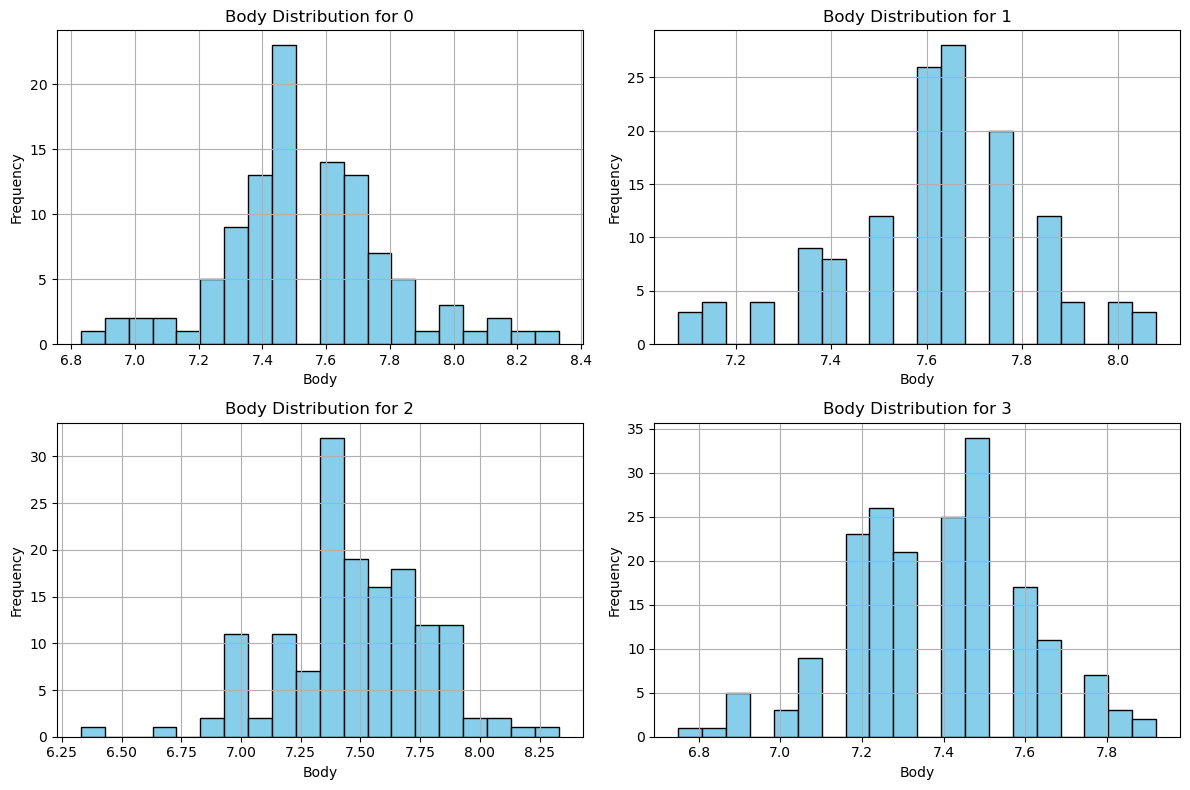

In [45]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Body'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Body Distribution for {country}')
    plt.xlabel('Body')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Balance

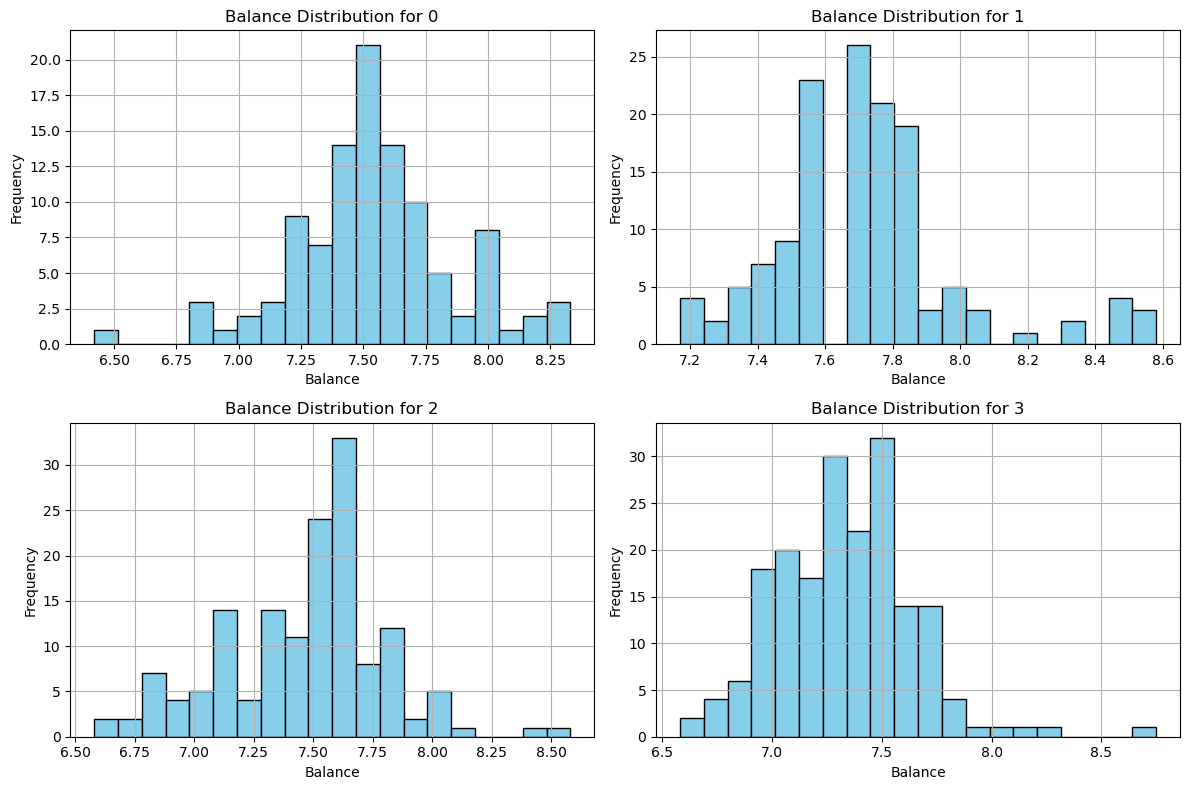

In [46]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Balance'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Balance Distribution for {country}')
    plt.xlabel('Balance')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Uniformity

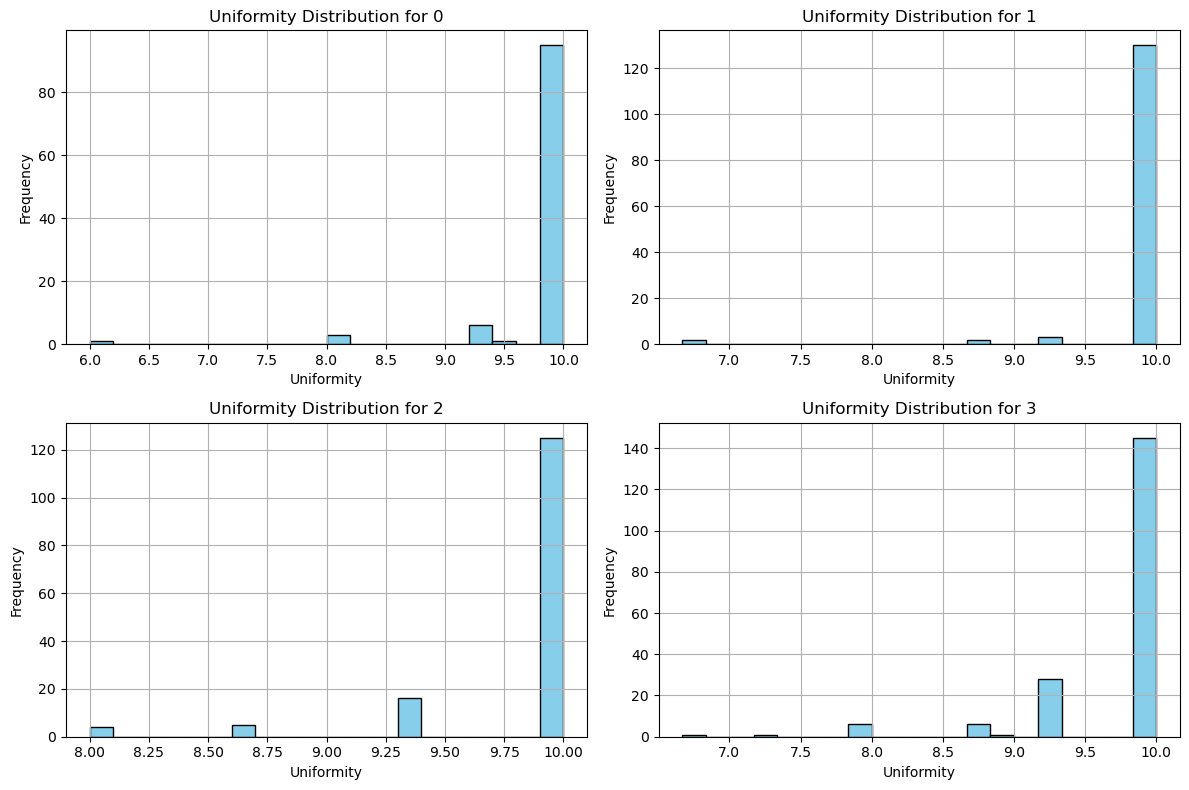

In [47]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Uniformity'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Uniformity Distribution for {country}')
    plt.xlabel('Uniformity')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Clean.Cup

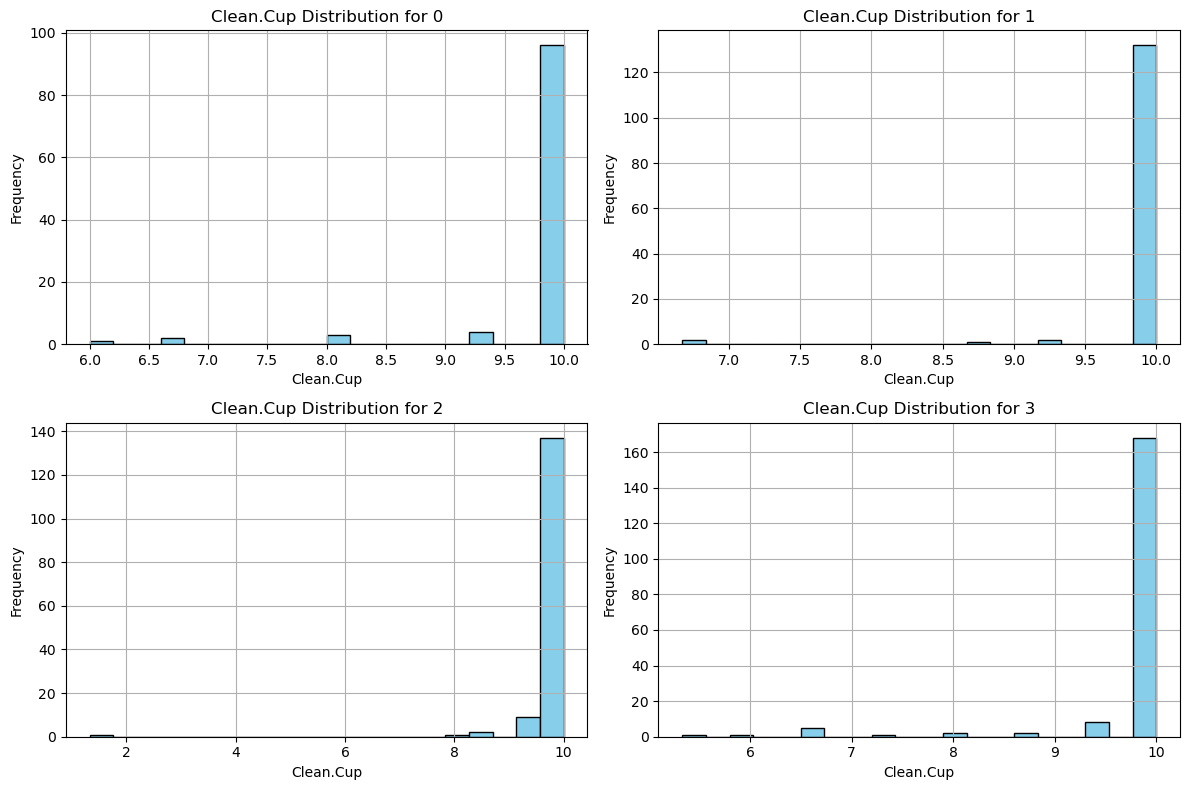

In [48]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Clean.Cup'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Clean.Cup Distribution for {country}')
    plt.xlabel('Clean.Cup')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Sweetness

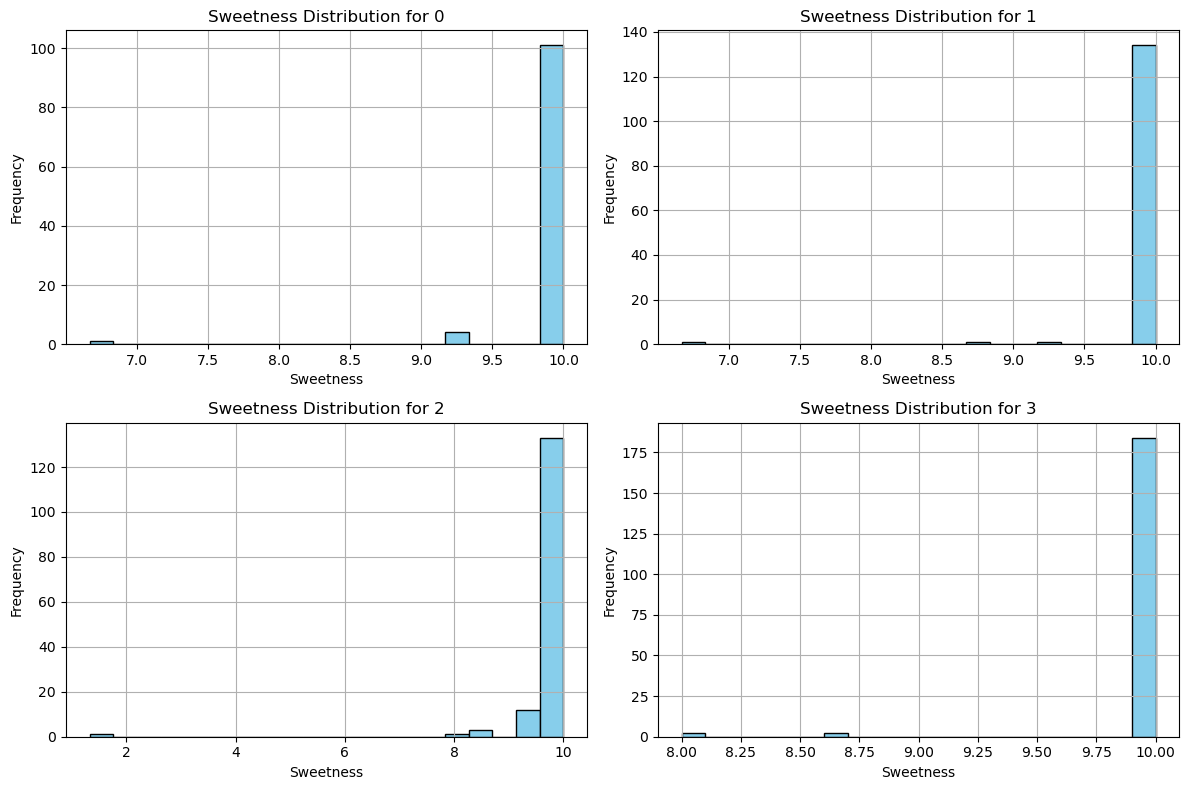

In [49]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Sweetness'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Sweetness Distribution for {country}')
    plt.xlabel('Sweetness')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Cupper.Points

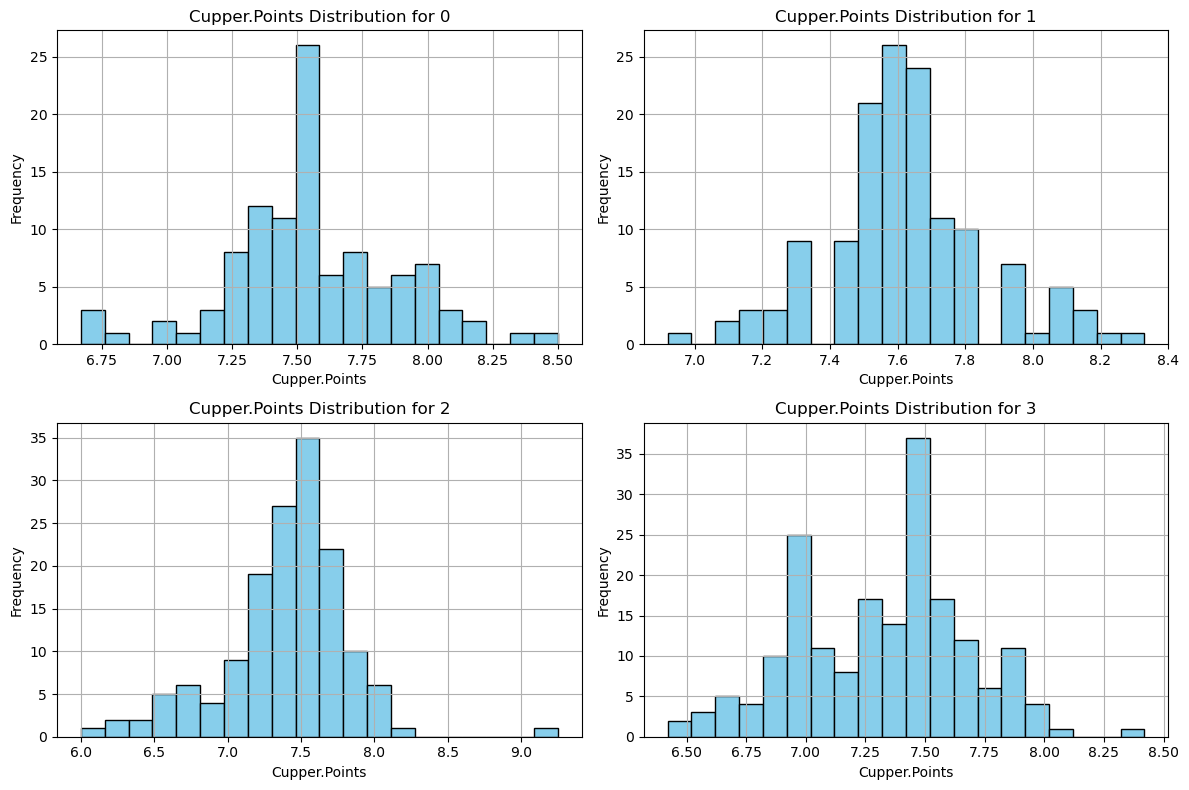

In [50]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Cupper.Points'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Cupper.Points Distribution for {country}')
    plt.xlabel('Cupper.Points')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Total.Cup.Points

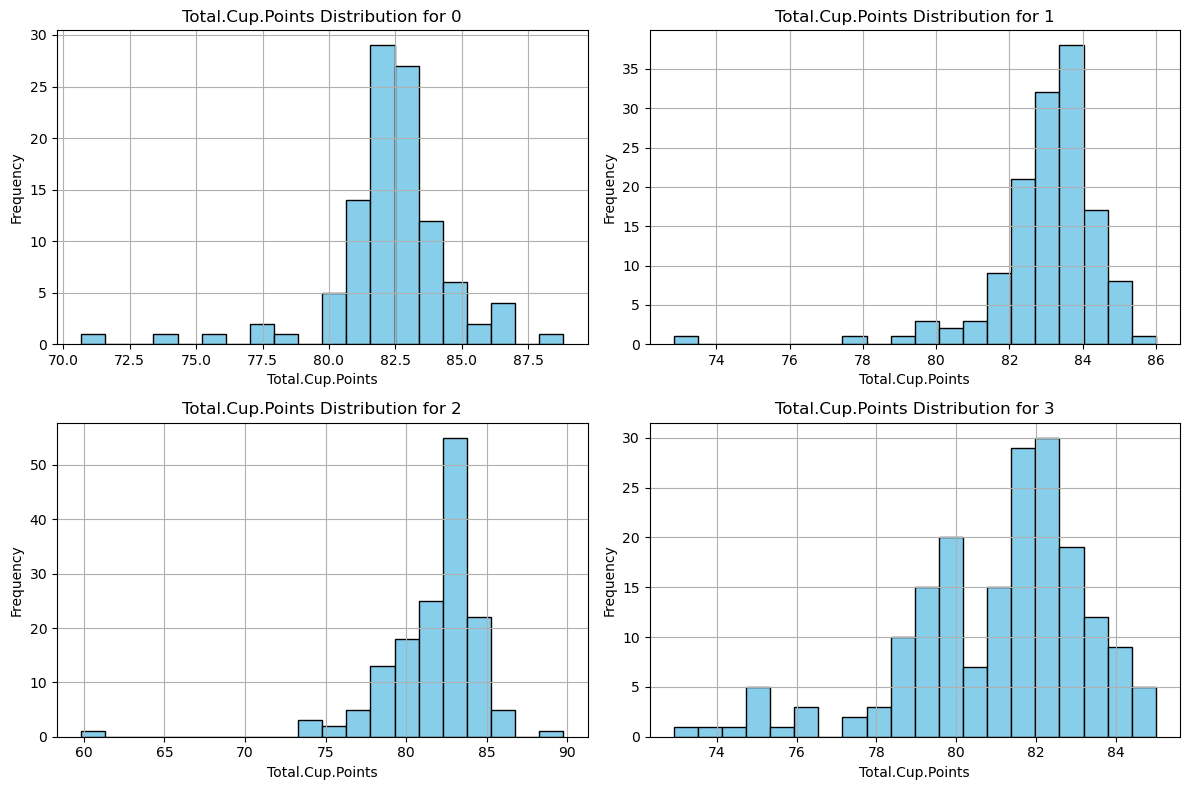

In [51]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Total.Cup.Points'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Total.Cup.Points Distribution for {country}')
    plt.xlabel('Total.Cup.Points')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Moisture

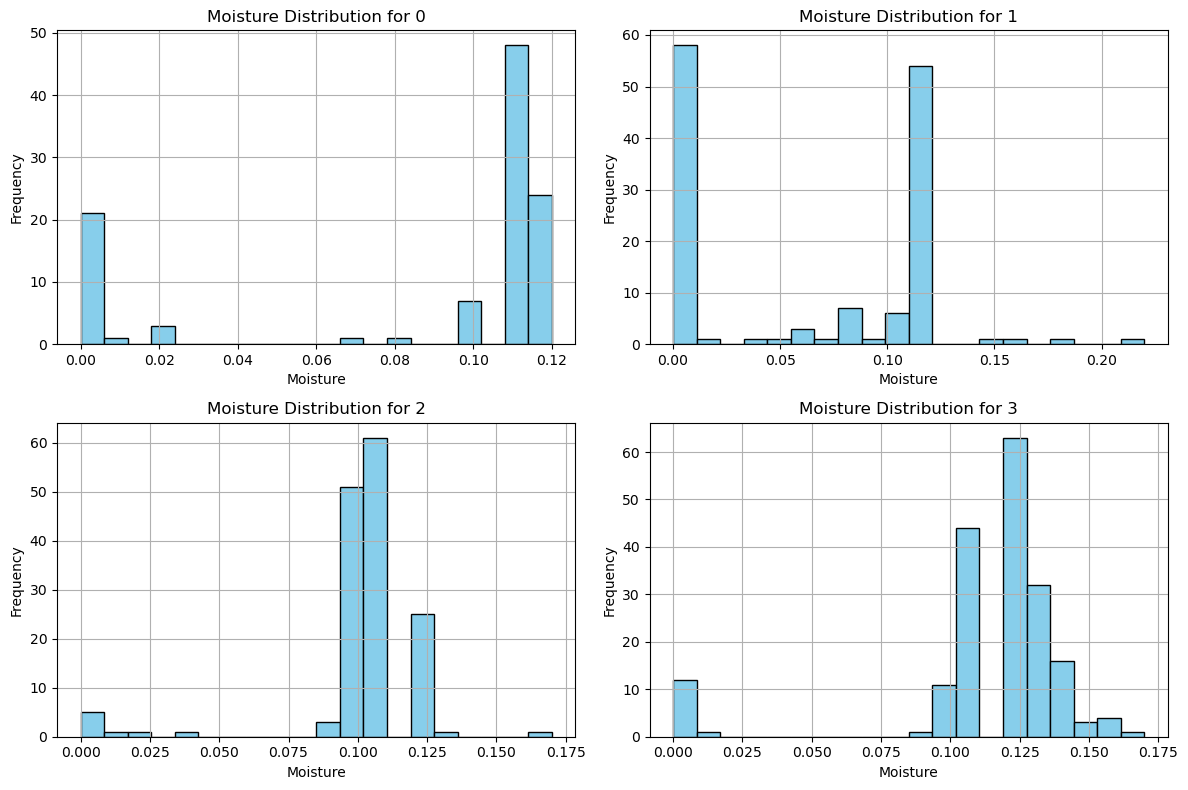

In [52]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Moisture'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Moisture Distribution for {country}')
    plt.xlabel('Moisture')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Category.One.Defects

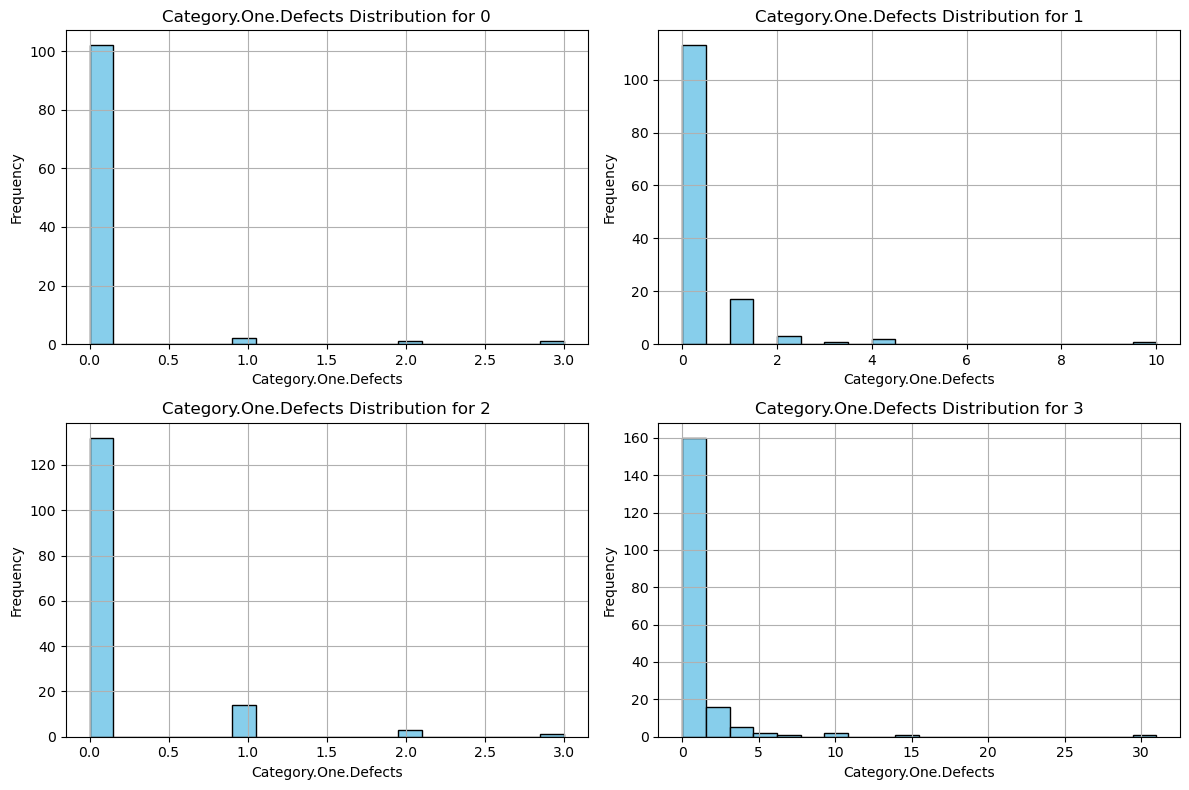

In [53]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Category.One.Defects'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Category.One.Defects Distribution for {country}')
    plt.xlabel('Category.One.Defects')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Quakers

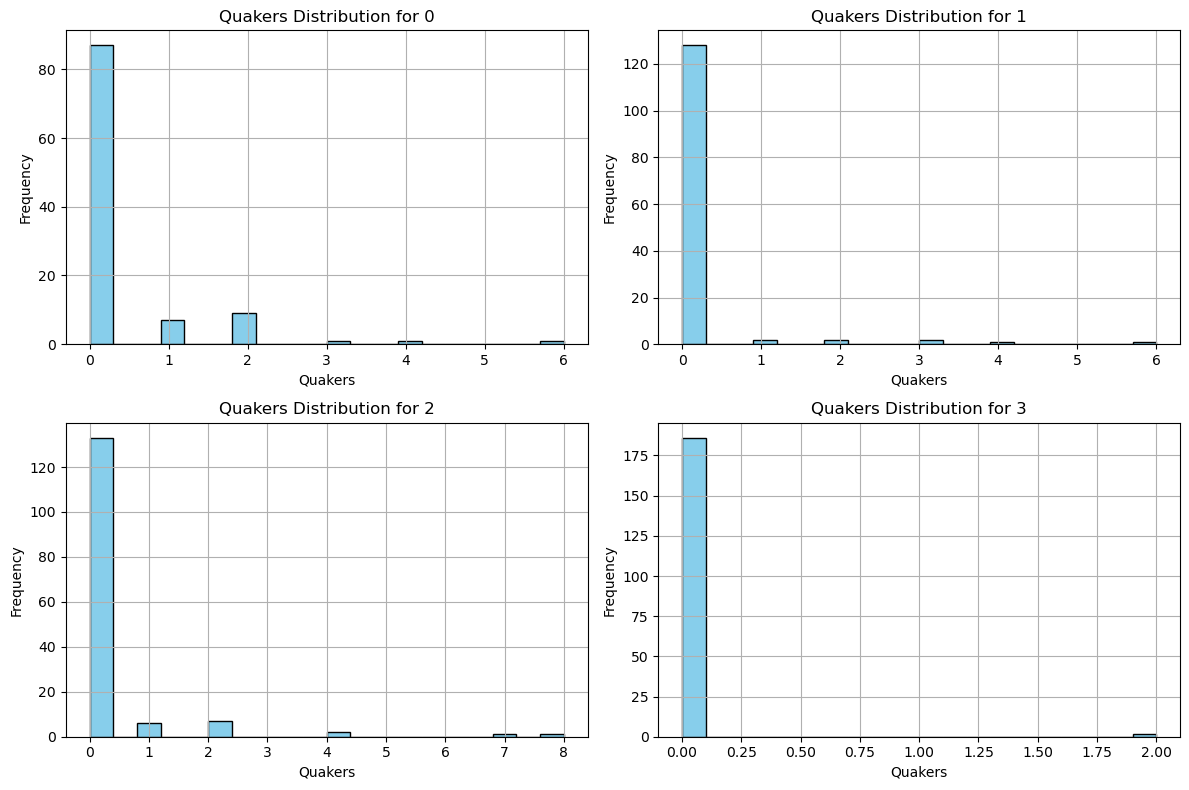

In [54]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Quakers'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Quakers Distribution for {country}')
    plt.xlabel('Quakers')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Color

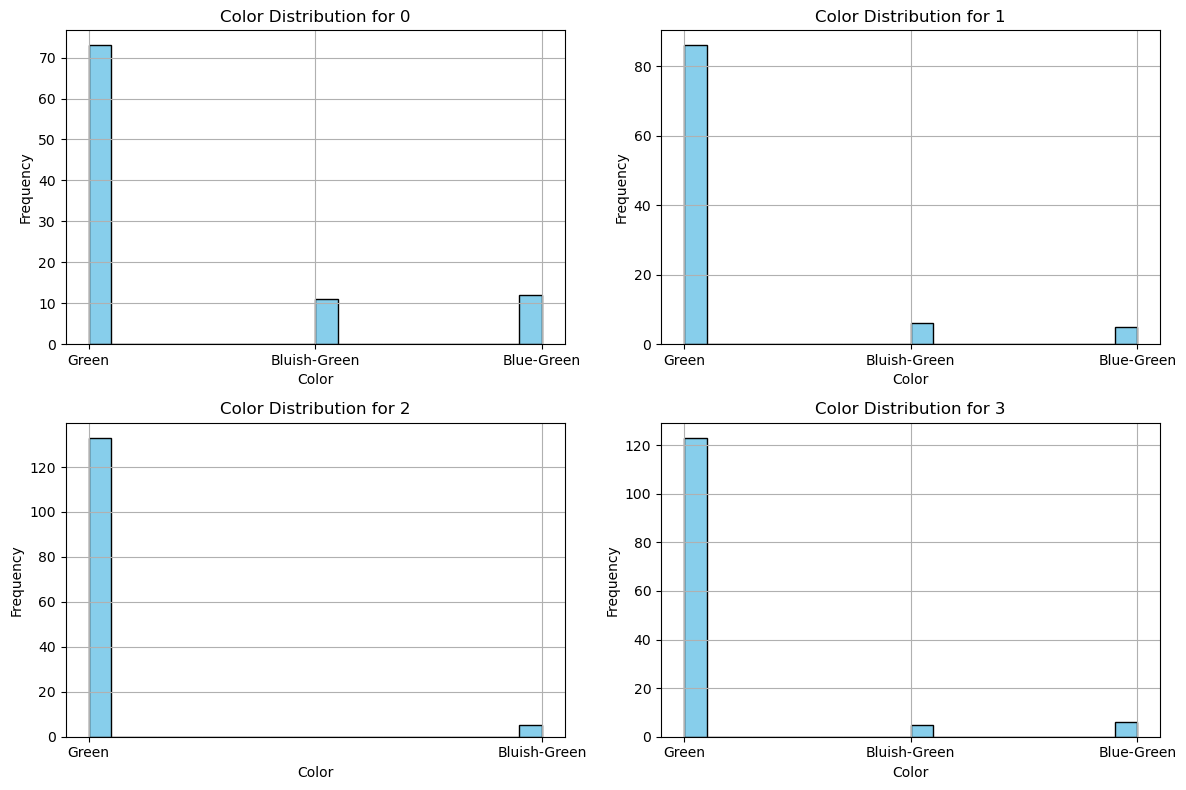

In [55]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Color'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Color Distribution for {country}')
    plt.xlabel('Color')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [56]:
train[train['Color'].isna()]['Country.of.Origin'].value_counts()

Country.of.Origin
3    54
1    40
2    12
0    10
Name: count, dtype: int64

In [57]:
train['Color'].fillna('Other', inplace=True)
test['Color'].fillna('Other', inplace=True)

In [58]:
train.isna().sum()

Number.of.Bags             0
Variety                    0
Processing.Method          0
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean.Cup                  0
Sweetness                  0
Cupper.Points              0
Total.Cup.Points           0
Moisture                   0
Category.One.Defects       0
Quakers                    1
Color                      0
Category.Two.Defects       0
Expiration                 0
Country.of.Origin          0
Farm.Name.Unit             0
Lot.Number.Unit            0
Converted.Altitude         0
Converted.Bag.Weight       0
Bag.Unit                   0
Harvest.Year.Unit          0
Extracted.Year            30
Variety.Unit               0
Processing.Method.Unit     0
dtype: int64

## Category.Two.Defects

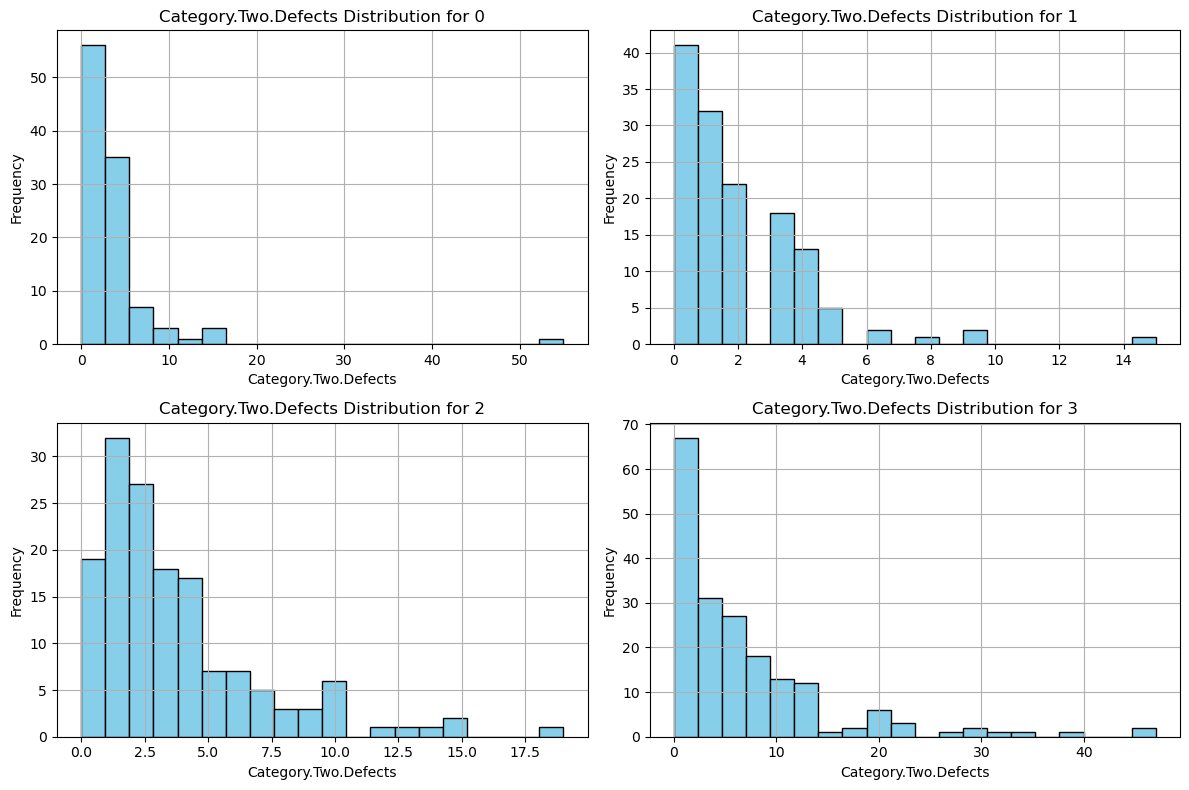

In [59]:
# train 데이터프레임으로 변환
train_df = train.copy()

# 각 나라별로 데이터프레임 분할
countries = train_df['Country.of.Origin'].unique()

countries = sorted(countries)
plt.figure(figsize=(12, 8))

# 각 나라에 대한 시각화
for i, country in enumerate(countries, 1):
    country_df = train_df[train_df['Country.of.Origin'] == country]
    plt.subplot(2, 2, i)
    plt.hist(country_df['Category.Two.Defects'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Category.Two.Defects Distribution for {country}')
    plt.xlabel('Category.Two.Defects')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Expiration

In [60]:
train['Expiration']

0        January 12th, 2013
1           July 28th, 2012
2       September 8th, 2018
3       February 13th, 2016
4      September 12th, 2015
               ...         
580          June 4th, 2016
581          July 3rd, 2018
582         July 11th, 2013
583      February 9th, 2012
584         April 8th, 2015
Name: Expiration, Length: 581, dtype: object

In [61]:
def parse_date(date_string):
    try:
        # 날짜 문자열을 datetime 객체로 변환
        date = pd.to_datetime(date_string)
        # 년, 월, 일, 요일 추출
        year = date.year
        month = date.month
        day = date.day
        day_of_week = date.day_name()
        return year, month, day, day_of_week
    except:
        return None, None, None, None
    
def preprocess_seasonality(month, day):
    # 월과 일을 0부터 1까지의 값으로 변환
    normalized_month = (month - 1) / 12  # 1월부터 12월까지를 0부터 1까지의 값으로 변환
    normalized_day = (day - 1) / 31  # 1일부터 31일까지를 0부터 1까지의 값으로 변환

    # sin과 cos 함수를 적용하여 전처리
    month_sin = -np.sin(2 * np.pi * normalized_month)
    month_cos = -np.cos(2 * np.pi * normalized_month)
    day_sin = -np.sin(2 * np.pi * normalized_day)
    day_cos = -np.cos(2 * np.pi * normalized_day)
    date_sin = -np.sin(2 * np.pi * (month+day/31)/12)
    date_cos = -np.cos(2 * np.pi * (month+day/31)/12)
    return month_sin, month_cos, day_sin, day_cos, date_sin, date_cos

train['Expiration.Year'], train['Expiration.Month'], train['Expiration.Day'], train['Expiration.Day_of_Week'] = zip(*train['Expiration'].apply(parse_date))
test['Expiration.Year'], test['Expiration.Month'], test['Expiration.Day'], test['Expiration.Day_of_Week'] = zip(*test['Expiration'].apply(parse_date))

# Expiration 열에서 월과 일 추출하여 전처리 적용
train['Expiration.Month_Sin'], train['Expiration.Month_Cos'], train['Expiration.Day_Sin'], train['Expiration.Day_Cos'], train['Expiration.Date_Sin'], train['Expiration.Date_Cos'] = zip(*train.apply(lambda x: preprocess_seasonality(x['Expiration.Month'], x['Expiration.Day']), axis=1))
test['Expiration.Month_Sin'], test['Expiration.Month_Cos'], test['Expiration.Day_Sin'], test['Expiration.Day_Cos'], test['Expiration.Date_Sin'], test['Expiration.Date_Cos'] = zip(*test.apply(lambda x: preprocess_seasonality(x['Expiration.Month'], x['Expiration.Day']), axis=1))

train.drop('Expiration', axis = 1, inplace = True)
test.drop('Expiration', axis = 1, inplace = True)

month_categories = {
    11: 1, 12: 1, 1: 1,

    2: 2, 3: 2, 4: 2,

    5: 3, 6: 3, 7: 3,

    8: 4, 9: 4, 10: 4
}

train['Expiration.Month.Unit'] = train['Expiration.Month'].map(month_categories)
test['Expiration.Month.Unit'] = test['Expiration.Month'].map(month_categories)

In [62]:
train

,Number.of.Bags,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,...,Expiration.Month,Expiration.Day,Expiration.Day_of_Week,Expiration.Month_Sin,Expiration.Month_Cos,Expiration.Day_Sin,Expiration.Day_Cos,Expiration.Date_Sin,Expiration.Date_Cos,Expiration.Month.Unit
0,250,Bourbon,Washed / Wet,7.17,6.08,6.17,7.25,7.33,7.33,10.0,...,1,12,Saturday,-0.000000e+00,-1.000000e+00,-0.790776,0.612106,-0.664095,-0.747649,1
1,275,Caturra,Other,7.33,7.33,7.33,7.58,7.25,8.08,10.0,...,7,28,Saturday,-1.224647e-16,1.000000e+00,0.724793,-0.688967,0.839589,0.543222,3
2,25,Bourbon,Washed / Wet,7.50,7.42,7.42,7.75,7.50,7.50,10.0,...,9,8,Saturday,8.660254e-01,5.000000e-01,-0.988468,-0.151428,0.990885,-0.134711,4
3,305,Catuai,Natural / Dry,7.67,7.67,7.67,7.50,7.42,7.50,10.0,...,2,13,Saturday,-5.000000e-01,-8.660254e-01,-0.651372,0.758758,-0.954139,-0.299363,2
4,1,Other,Washed / Wet,7.50,7.42,7.42,7.42,7.67,7.42,10.0,...,9,12,Saturday,8.660254e-01,5.000000e-01,-0.790776,0.612106,0.979530,-0.201299,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,275,Other,Washed / Wet,7.83,7.75,7.83,7.58,7.67,7.75,10.0,...,6,4,Saturday,-5.000000e-01,8.660254e-01,-0.571268,-0.820763,0.067510,0.997719,3
581,200,Mundo Novo,Washed / Wet,7.83,7.83,7.58,7.92,7.42,7.50,10.0,...,7,3,Tuesday,-1.224647e-16,1.000000e+00,-0.394356,-0.918958,0.543222,0.839589,3
582,250,Bourbon,Washed / Wet,7.50,7.67,7.50,7.50,7.58,7.58,10.0,...,7,11,Thursday,-1.224647e-16,1.000000e+00,-0.897805,0.440394,0.651372,0.758758,3
583,250,Other,Other,7.58,7.67,7.42,7.17,7.17,7.75,10.0,...,2,9,Thursday,-5.000000e-01,-8.660254e-01,-0.998717,0.050649,-0.931753,-0.363094,2


In [63]:
def fill_extracted_year(row):
    if pd.isnull(row['Extracted.Year']) or not (str(row['Extracted.Year']).isdigit() and len(str(row['Extracted.Year'])) == 4):
        return row['Expiration.Year'] - 1
    else:
        return row['Extracted.Year']

# apply 함수를 사용하여 결측치를 채움
train['Extracted.Year'] = train.apply(fill_extracted_year, axis=1)
test['Extracted.Year'] = test.apply(fill_extracted_year, axis=1)


train['Extracted.Year'] = train['Extracted.Year'].astype(int)
test['Extracted.Year'] = test['Extracted.Year'].astype(int)

In [64]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 0 to 584
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Number.of.Bags          581 non-null    int64  
 1   Variety                 581 non-null    object 
 2   Processing.Method       581 non-null    object 
 3   Aroma                   581 non-null    float64
 4   Flavor                  581 non-null    float64
 5   Aftertaste              581 non-null    float64
 6   Acidity                 581 non-null    float64
 7   Body                    581 non-null    float64
 8   Balance                 581 non-null    float64
 9   Uniformity              581 non-null    float64
 10  Clean.Cup               581 non-null    float64
 11  Sweetness               581 non-null    float64
 12  Cupper.Points           581 non-null    float64
 13  Total.Cup.Points        581 non-null    float64
 14  Moisture                581 non-null    float64

# Encoding

## Label Encoding

In [66]:
# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

label_column = []

# train 데이터프레임의 문자열 열에 대해 label encoding 수행
for column in train.columns:
    if train[column].dtype == 'object':
        label_column.append(column)
        train[column] = label_encoder.fit_transform(train[column])
        test[column] = test[column].map(lambda s: label_encoder.transform([s])[0] if s in label_encoder.classes_ else -1)

In [67]:
label_column

['Variety', 'Processing.Method', 'Color', 'Expiration.Day_of_Week']

## Target Encoding

In [68]:
# 필요한 행에 대해 각 컬럼의 country.of.origin의 평균을 집어넣는 Target Encoding 진행

for column in train.columns:
    if 'Unit' in column or column in label_column:
        print(column)
        target_mean = train.groupby(column)['Country.of.Origin'].mean()
        
        train[column+".Unit"] = train[column].map(target_mean)
        test[column+".Unit"] = test[column].map(target_mean)

Variety
Processing.Method
Color
Farm.Name.Unit
Lot.Number.Unit
Bag.Unit
Harvest.Year.Unit
Variety.Unit
Processing.Method.Unit
Expiration.Day_of_Week
Expiration.Month.Unit


## Scaler

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer

scaler = StandardScaler()

for column in train.columns:
    if 'Country.of.Origin' != column and 'Cos' not in column and 'Sin' not in column and 'Category' not in column and 'Unit' not in column and column not in label_column:
        print(column)
        train[column] = scaler.fit_transform(train[column].values.reshape(-1, 1))
        test[column] = scaler.transform(test[column].values.reshape(-1, 1))

Number.of.Bags
Aroma
Flavor
Aftertaste
Acidity
Body
Balance
Uniformity
Clean.Cup
Sweetness
Cupper.Points
Total.Cup.Points
Moisture
Quakers
Converted.Altitude
Converted.Bag.Weight
Extracted.Year
Expiration.Year
Expiration.Month
Expiration.Day


# Modeling

In [70]:
train.columns

Index(['Number.of.Bags', 'Variety', 'Processing.Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup',
       'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Moisture',
       'Category.One.Defects', 'Quakers', 'Color', 'Category.Two.Defects',
       'Country.of.Origin', 'Farm.Name.Unit', 'Lot.Number.Unit',
       'Converted.Altitude', 'Converted.Bag.Weight', 'Bag.Unit',
       'Harvest.Year.Unit', 'Extracted.Year', 'Variety.Unit',
       'Processing.Method.Unit', 'Expiration.Year', 'Expiration.Month',
       'Expiration.Day', 'Expiration.Day_of_Week', 'Expiration.Month_Sin',
       'Expiration.Month_Cos', 'Expiration.Day_Sin', 'Expiration.Day_Cos',
       'Expiration.Date_Sin', 'Expiration.Date_Cos', 'Expiration.Month.Unit',
       'Color.Unit', 'Farm.Name.Unit.Unit', 'Lot.Number.Unit.Unit',
       'Bag.Unit.Unit', 'Harvest.Year.Unit.Unit', 'Variety.Unit.Unit',
       'Processing.Method.Unit.Unit', 'Expiration.Day_of_Week.Unit',
  

In [71]:
import random
# 후처리 기법 추가
def post_processing_test1_data(predict):
    post_train = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/DATASET/train.csv")
    post_test = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/DATASET/test_1.csv")

    # 
    farm_country_mapping = post_train.groupby('Farm.Name')['Country.of.Origin'].apply(set).to_dict()

    for i in range(len(post_test)):
        for farm in farm_country_mapping:
            if str(post_test.loc[i,'Farm.Name']) in farm or farm in str(post_test.loc[i,'Farm.Name']):
                if predict[i] not in farm_country_mapping[farm]:
                    if len(farm_country_mapping[farm]) > 2:
                        predict[i] = random.choice(list(farm_country_mapping[farm]))
                    else:
                        predict[i] = list(farm_country_mapping[farm])[0]
    return predict

In [74]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from SVM import MulticlassSVMClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

def multiclass_svm_grid_search(X, y, X_test, param_grid, n_splits=5, random_seed=0, oversampling = False):
    # 랜덤 시드 고정
    np.random.seed(random_seed)
    
    # 가장 정확도가 높은 모델을 저장하기 위해 선언
    best_score = -np.inf
    best_params = None
    best_predict = []
    
    # stratified KFold 로 y의 분포를 고정 validation
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    for n_iters in param_grid['n_iters']: 
        for lr in param_grid['lr']:
            for lambda_param in param_grid['lambda_param']:
                for oversampler in param_grid['oversampler']:
                    if oversampling == True:
                        # SVM 지정 및 파라미터 고정
                        svm = MulticlassSVMClassifier(n_iters = n_iters, lr = lr, lambda_param = lambda_param)
                        
                        scores = []
                        predict = []
                        for train_idx, val_idx in skf.split(X, y):
                            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
                            if oversampler == "None":
                                pass
                            if oversampler == 'ros':
                                ros = RandomOverSampler(random_state=random_seed)
                                X_train, y_train = ros.fit_resample(X_train, y_train)

                            elif oversampler == 'smote':
                                smote = SMOTE(random_state=random_seed)
                                X_train, y_train = smote.fit_resample(X_train, y_train)

                            elif oversampler == 'adasyn':
                                adasyn = ADASYN(random_state=random_seed)
                                X_train, y_train = adasyn.fit_resample(X_train, y_train)

                            elif oversampler == 'smote_enn':
                                smote_enn = SMOTEENN(random_state=random_seed)
                                X_train, y_train = smote_enn.fit_resample(X_train, y_train)

                            elif oversampler == 'smote_tomek':
                                smote_tomek = SMOTETomek(random_state=random_seed)
                                X_train, y_train = smote_tomek.fit_resample(X_train, y_train)
                            

                            X_train, y_train = X_train.values, y_train.values
                            X_val, y_val = X_val.values, y_val.values
                            
                            # model 학습
                            svm.fit(X_train, y_train)

                            # validation 예측
                            predictions = svm.predict(X_val)

                            # 모델 평가
                            accuracy = svm.get_accuracy(y_val, predictions)
                            scores.append(accuracy)

                            # test prediction
                            predict.append(post_processing_test1_data(svm.predict(X_test)))
                        
                        # Kfold한 validation score 계산
                        avg_score = np.mean(scores)
                        
                        params = {'n_iters': n_iters, 'lr': lr, 'lambda_param': lambda_param, 'oversampler': oversampler}

                        prediction_test = np.array(predict)
                        prediction_test = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=prediction_test)

                        # 가장 높은 스코어 저장
                        if avg_score >= best_score:
                            best_score = avg_score
                            best_params = {'n_iters': n_iters, 'lr': lr, 'lambda_param': lambda_param, 'oversampler': oversampler}
                            best_predict = predict[:]

                            print("="*20)
                            print(params)
                            print('validation score:', avg_score)
                            print("="*20)   

    prediction_test = np.array(best_predict)
    final_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=prediction_test)
    return best_params, best_score, final_predictions
"""
# Grid Search를 위한 파라미터
param_grid = {
    'n_iters': [i*50 for i in range(1,21)],
    'lr': [0.0001 ,0.001],
    'lambda_param': [0.0001, 0.001, 0.01, 0.1, 1, 2, 3],
    'oversampler' : ['ros', 'smote', 'adasyn', 'smote_enn', 'smote_tomek', 'None']
}
"""

# Final model 파라미터
param_grid = {'n_iters': [150], 'lr': [0.001], 'lambda_param': [0.0001], 'oversampler': ['None']}


X = train.drop('Country.of.Origin', axis = 1)
y = train['Country.of.Origin']

X_test = test.drop('Country.of.Origin', axis = 1)

best_params, best_score, best_predict = multiclass_svm_grid_search(X, y, X_test, param_grid, oversampling = True, random_seed = 1)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Best Predict:", best_predict)


{'n_iters': 150, 'lr': 0.001, 'lambda_param': 0.0001, 'oversampler': 'None'}
validation score: 0.8966254052460949
Best Parameters: {'n_iters': 150, 'lr': 0.001, 'lambda_param': 0.0001, 'oversampler': 'None'}
Best Score: 0.8966254052460949
Best Predict: [0 3 3 3 3 1 3 3 3 3 1 3 3 0 3 1 3 3 3 0 3 1 0 3 3 0 0 3 1 3 0 3 1 3 3 3 1
 3 3 1 3 3 2 3 2 3 0 0 3 1 0 1 2 3 1 3 3 3 2 3 3 2 3 3 1 0]


In [73]:
submit_test = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/DATASET/test_1.csv")
submit_test['Country.of.Origin'] = best_predict

submit_test2 = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/DATASET/test_2.csv")
submit_test2['Country.of.Origin'] = submit_test2['Country.of.Origin'].astype(int)

merged_df = pd.merge(submit_test, submit_test2, how='outer')

sorted_df = merged_df.sort_values(by='Unnamed: 0')

sub = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/DATASET/submission.csv")
sub['Country.of.Origin'] = sorted_df['Country.of.Origin'].values
sub.to_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/SUBMISSION/spilt_modeling_oversampling7.csv", index = False)

'submit_test = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/DATASET/test_1.csv")\nsubmit_test[\'Country.of.Origin\'] = best_predict\n\nsubmit_test2 = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/DATASET/test_2.csv")\nsubmit_test2[\'Country.of.Origin\'] = submit_test2[\'Country.of.Origin\'].astype(int)\n\nmerged_df = pd.merge(submit_test, submit_test2, how=\'outer\')\n\nsorted_df = merged_df.sort_values(by=\'Unnamed: 0\')\n\nsub = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/DATASET/submission.csv")\nsub[\'Country.of.Origin\'] = sorted_df[\'Country.of.Origin\'].values\nsub.to_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 1/SUBMISSION/spilt_modeling_oversampling7.csv", index = False)'